# Naval propulsion System

## Importing the libraries

In [1]:
# Basic libraries
import numpy as np # This is for basic linear algebra, basic statistical operations and random simulation
import pandas as pd # This is for statistical computing, data processing and reading and writing data
import matplotlib.pyplot as plt # This is for creating static, animated, and interactive visualizations
import seaborn as sns # This is for statistical data visualization

pd.plotting.register_matplotlib_converters()
%matplotlib inline


# Train Test Split
from sklearn.model_selection import train_test_split


# Libraries for algorithms and models

# Linear Regression
from sklearn.linear_model import LinearRegression

# Support Vector Regression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor

# Neural Network
from sklearn.neural_network import MLPRegressor

# K- Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import BaggingRegressor # DT Bagging
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boost
from sklearn.ensemble import BaggingRegressor # Gradient Boost
from xgboost import XGBRegressor # XG Boost

# Evaluation Criterias
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

print("Setup complete!")

Setup complete!


## Importing the dataset

In [2]:
# Importing the dataset
# Whitespace is used as a separator and the data has no header column
nps = pd.read_csv (r'C:\Users\ASUS\Desktop\Python_Masterarbeit\New Dataset\New_test.txt', delim_whitespace=True, header=None)
# Path needs to be changed!

# Rounding values to 3 decimals
nps = nps.round(3)

## Data Preparation and Data Cleaning

In [3]:
# Assign names to columns
nps.columns = ['lp','v','GTT','GT_rpm','CPP_S','CPP_P','QP','rpm_P',
                       'QS','rpm_S','T48','GG_rpm','mf','ABB_TIC','P2','T2',
                       'Pext','P48','TCS_TIC','KtS','rps_prop_S','KtP','rps_prop_P',
                       'Q_prop_P','Q_prop_S','Kkt','Kkq','Khull','KMc','KMt']

# Print 5 top rows of the dataset
nps.head()

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S,Kkt,Kkq,Khull,KMc,KMt
0,1.138,3,7252.5,1357.6,7.800,7.800,40835.0,59.448,40835.0,59.448,...,0.991,0.017,0.991,26763.0,26763.0,0.9,1.1,1.0,1.0,1.0
1,2.088,6,3919.9,1378.8,27.759,27.759,62949.0,60.379,62949.0,60.379,...,1.006,0.054,1.006,45078.0,45078.0,0.9,1.1,1.0,1.0,1.0
2,3.144,9,9446.5,1386.7,58.429,58.429,107870.0,60.725,107870.0,60.725,...,1.012,0.111,1.012,84240.0,84240.0,0.9,1.1,1.0,1.0,1.0
3,4.161,12,16777.0,1547.5,108.870,108.870,191560.0,67.765,191560.0,67.765,...,1.129,0.168,1.129,163560.0,163560.0,0.9,1.1,1.0,1.0,1.0
4,5.140,15,24683.0,1924.8,168.150,168.150,281840.0,84.289,281840.0,84.289,...,1.405,0.173,1.405,252740.0,252740.0,0.9,1.1,1.0,1.0,1.0


In [4]:
nps.describe()

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S,Kkt,Kkq,Khull,KMc,KMt
count,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000,...,589223.000000,589223.000000,589223.000000,589223.0000,589223.0000,589223.000000,589223.000000,589223.000000,589223.000000,589223.000000
mean,5.166053,14.998177,29929.568972,2135.231645,232.376110,232.376110,341574.929395,93.502109,341574.929395,93.502109,...,1.558321,0.147373,1.558321,314777.7761,314777.7761,0.953116,1.046884,1.093749,0.976552,0.988312
std,2.626270,7.745928,24178.106721,770.738707,201.792355,201.792355,276108.112868,33.750726,276108.112868,33.750726,...,0.562549,0.063309,0.562549,269784.6055,269784.6055,0.032299,0.032299,0.064476,0.016066,0.008007
min,1.138000,3.000000,241.320000,1306.900000,5.308000,5.308000,34810.000000,57.228000,34810.000000,57.228000,...,0.954000,0.012000,0.954000,22022.0000,22022.0000,0.900000,1.000000,1.000000,0.950000,0.975000
25%,3.144000,9.000000,8845.600000,1386.800000,60.878000,60.878000,101000.000000,60.726000,101000.000000,60.726000,...,1.012000,0.115000,1.012000,77909.5000,77909.5000,0.921000,1.021000,1.043000,0.961000,0.980000
50%,5.140000,15.000000,23814.000000,1924.600000,181.070000,181.070000,271940.000000,84.278000,271940.000000,84.278000,...,1.405000,0.181000,1.405000,243250.0000,243250.0000,0.950000,1.050000,1.086000,0.975000,0.989000
75%,7.148000,21.000000,44822.000000,2678.100000,352.150000,352.150000,511840.000000,117.270000,511840.000000,117.270000,...,1.955000,0.191000,1.955000,480960.0000,480960.0000,0.979000,1.079000,1.143000,0.989000,0.996000
max,9.300000,27.000000,83143.000000,3570.300000,694.330000,694.330000,949570.000000,156.350000,949570.000000,156.350000,...,2.606000,0.216000,2.606000,909710.0000,909710.0000,1.000000,1.100000,1.200000,1.000000,1.000000


In [5]:
# Get the number of missing values per column
missing_values_count = nps.isnull().sum()

# look at the numbers of missing values
missing_values_count[0:31]

lp            0
v             0
GTT           0
GT_rpm        0
CPP_S         0
CPP_P         0
QP            0
rpm_P         0
QS            0
rpm_S         0
T48           0
GG_rpm        0
mf            0
ABB_TIC       0
P2            0
T2            0
Pext          0
P48           0
TCS_TIC       0
KtS           0
rps_prop_S    0
KtP           0
rps_prop_P    0
Q_prop_P      0
Q_prop_S      0
Kkt           0
Kkq           0
Khull         0
KMc           0
KMt           0
dtype: int64

In [6]:
# Showing amount of unique values each columns
def Uniquevalue(un_val):
    for col in un_val:
        print(col, len(un_val[col].unique()))

print("This shows amount of unique values each columns: \n")
        
Uniquevalue(nps)

This shows amount of unique values each columns: 

lp 9
v 9
GTT 90428
GT_rpm 2524
CPP_S 53311
CPP_P 53311
QP 62580
rpm_P 5622
QS 62580
rpm_S 5622
T48 50735
GG_rpm 19208
mf 1416
ABB_TIC 51838
P2 12039
T2 21675
Pext 35
P48 2035
TCS_TIC 67235
KtS 108
rps_prop_S 203
KtP 108
rps_prop_P 203
Q_prop_P 65659
Q_prop_S 65659
Kkt 15
Kkq 15
Khull 15
KMc 15
KMt 15


In [10]:
# Get the total numbers of missing values
total_cells = np.product(nps.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print("This is the percentage of missing values: ", percent_missing, "\n")

print("This is the shape of the data: ", nps.shape, "\n")

print("This is the data type of each features:\n", nps.dtypes)

This is the percentage of missing values:  0.0 

This is the shape of the data:  (589223, 30) 

This is the data type of each features:
 lp            float64
v               int64
GTT           float64
GT_rpm        float64
CPP_S         float64
CPP_P         float64
QP            float64
rpm_P         float64
QS            float64
rpm_S         float64
T48           float64
GG_rpm        float64
mf            float64
ABB_TIC       float64
P2            float64
T2            float64
Pext          float64
P48           float64
TCS_TIC       float64
KtS           float64
rps_prop_S    float64
KtP           float64
rps_prop_P    float64
Q_prop_P      float64
Q_prop_S      float64
Kkt           float64
Kkq           float64
Khull         float64
KMc           float64
KMt           float64
dtype: object


In [11]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589223 entries, 0 to 589222
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   lp          589223 non-null  float64
 1   v           589223 non-null  int64  
 2   GTT         589223 non-null  float64
 3   GT_rpm      589223 non-null  float64
 4   CPP_S       589223 non-null  float64
 5   CPP_P       589223 non-null  float64
 6   QP          589223 non-null  float64
 7   rpm_P       589223 non-null  float64
 8   QS          589223 non-null  float64
 9   rpm_S       589223 non-null  float64
 10  T48         589223 non-null  float64
 11  GG_rpm      589223 non-null  float64
 12  mf          589223 non-null  float64
 13  ABB_TIC     589223 non-null  float64
 14  P2          589223 non-null  float64
 15  T2          589223 non-null  float64
 16  Pext        589223 non-null  float64
 17  P48         589223 non-null  float64
 18  TCS_TIC     589223 non-null  float64
 19  Kt

## Data Preprocessing

### Check corellation between parameters

In [10]:
# Check the correlation between collumns with spearman method
nps.corr(method ='spearman')
np.round(nps.corr(method ='spearman'),2)

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S,Kkt,Kkq,Khull,KMc,KMt
lp,1.00,1.00,0.99,0.97,0.99,0.99,0.99,0.97,0.99,0.97,...,0.97,0.86,0.97,0.99,0.99,-0.00,0.00,-0.00,0.00,-0.00
v,1.00,1.00,0.99,0.97,0.99,0.99,0.99,0.97,0.99,0.97,...,0.97,0.86,0.97,0.99,0.99,-0.00,0.00,-0.00,0.00,-0.00
GTT,0.99,0.99,1.00,0.97,0.98,0.98,0.99,0.97,0.99,0.97,...,0.97,0.86,0.97,0.99,0.99,-0.08,0.08,0.04,-0.00,0.00
GT_rpm,0.97,0.97,0.97,1.00,0.97,0.97,0.97,1.00,0.97,1.00,...,1.00,0.82,1.00,0.97,0.97,-0.04,0.04,-0.03,-0.01,0.01
CPP_S,0.99,0.99,0.98,0.97,1.00,1.00,0.99,0.97,0.99,0.97,...,0.97,0.90,0.97,0.99,0.99,0.04,-0.04,0.08,0.00,0.00
CPP_P,0.99,0.99,0.98,0.97,1.00,1.00,0.99,0.97,0.99,0.97,...,0.97,0.90,0.97,0.99,0.99,0.04,-0.04,0.08,0.00,0.00
QP,0.99,0.99,0.99,0.97,0.99,0.99,1.00,0.97,1.00,0.97,...,0.97,0.86,0.97,1.00,1.00,-0.09,0.09,0.04,0.00,0.00
rpm_P,0.97,0.97,0.97,1.00,0.97,0.97,0.97,1.00,0.97,1.00,...,1.00,0.82,1.00,0.97,0.97,-0.04,0.04,-0.03,-0.01,0.01
QS,0.99,0.99,0.99,0.97,0.99,0.99,1.00,0.97,1.00,0.97,...,0.97,0.86,0.97,1.00,1.00,-0.09,0.09,0.04,0.00,0.00
rpm_S,0.97,0.97,0.97,1.00,0.97,0.97,0.97,1.00,0.97,1.00,...,1.00,0.82,1.00,0.97,0.97,-0.04,0.04,-0.03,-0.01,0.01


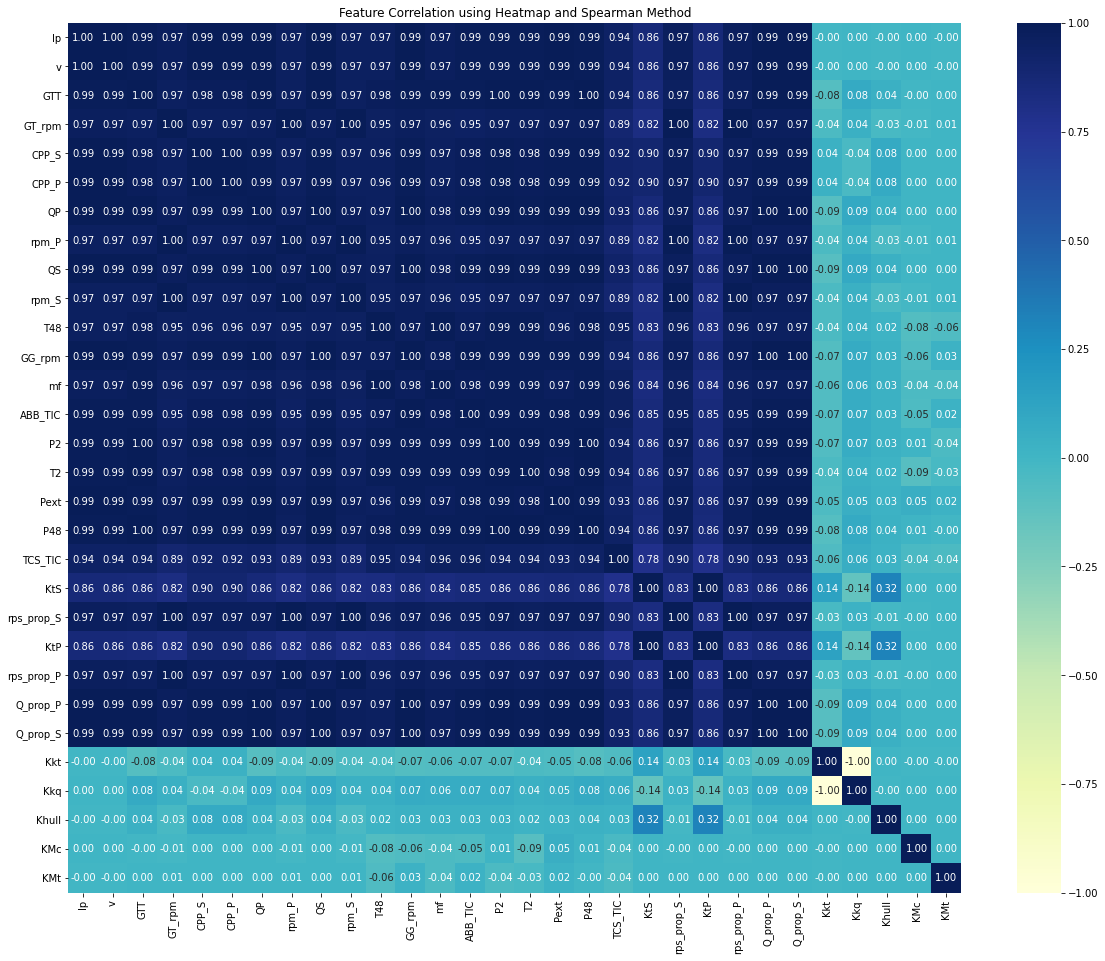

In [50]:
# Check the correlation between features using heatmap and spearman method
corr_matrix = nps.corr(method = 'spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin = -1, vmax = 1, cmap="YlGnBu")
plt.title("Feature Correlation using Heatmap and Spearman Method")
plt.show()

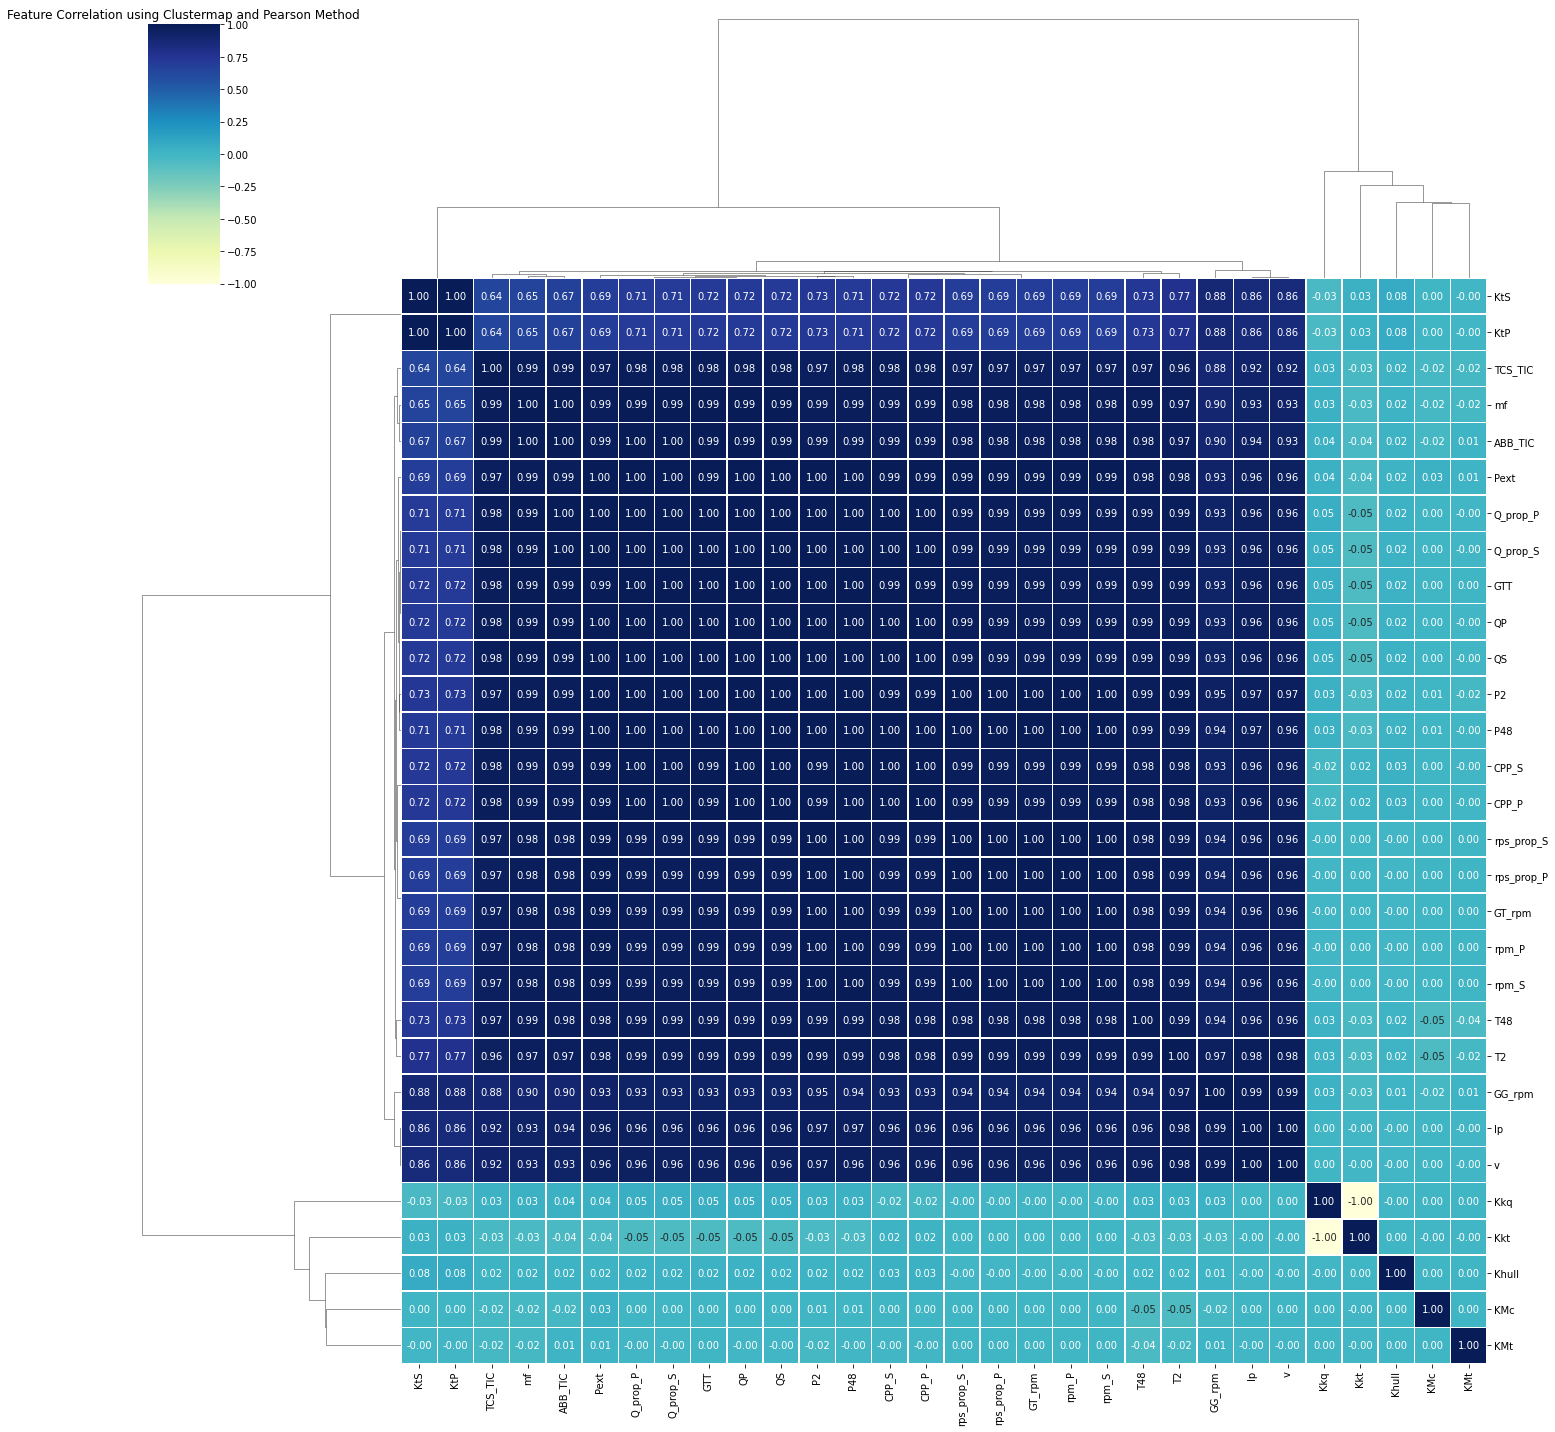

In [52]:
# Check the correlation between features using clustermap and pearson method
corr_matrix = nps.corr(method = 'pearson')

sns.clustermap(corr_matrix, annot=True, fmt=".2f", linewidth=0.5, cmap="YlGnBu", figsize = (20,20))
plt.title("Feature Correlation using Clustermap and Pearson Method")
plt.show()

### Check outliers using graphics

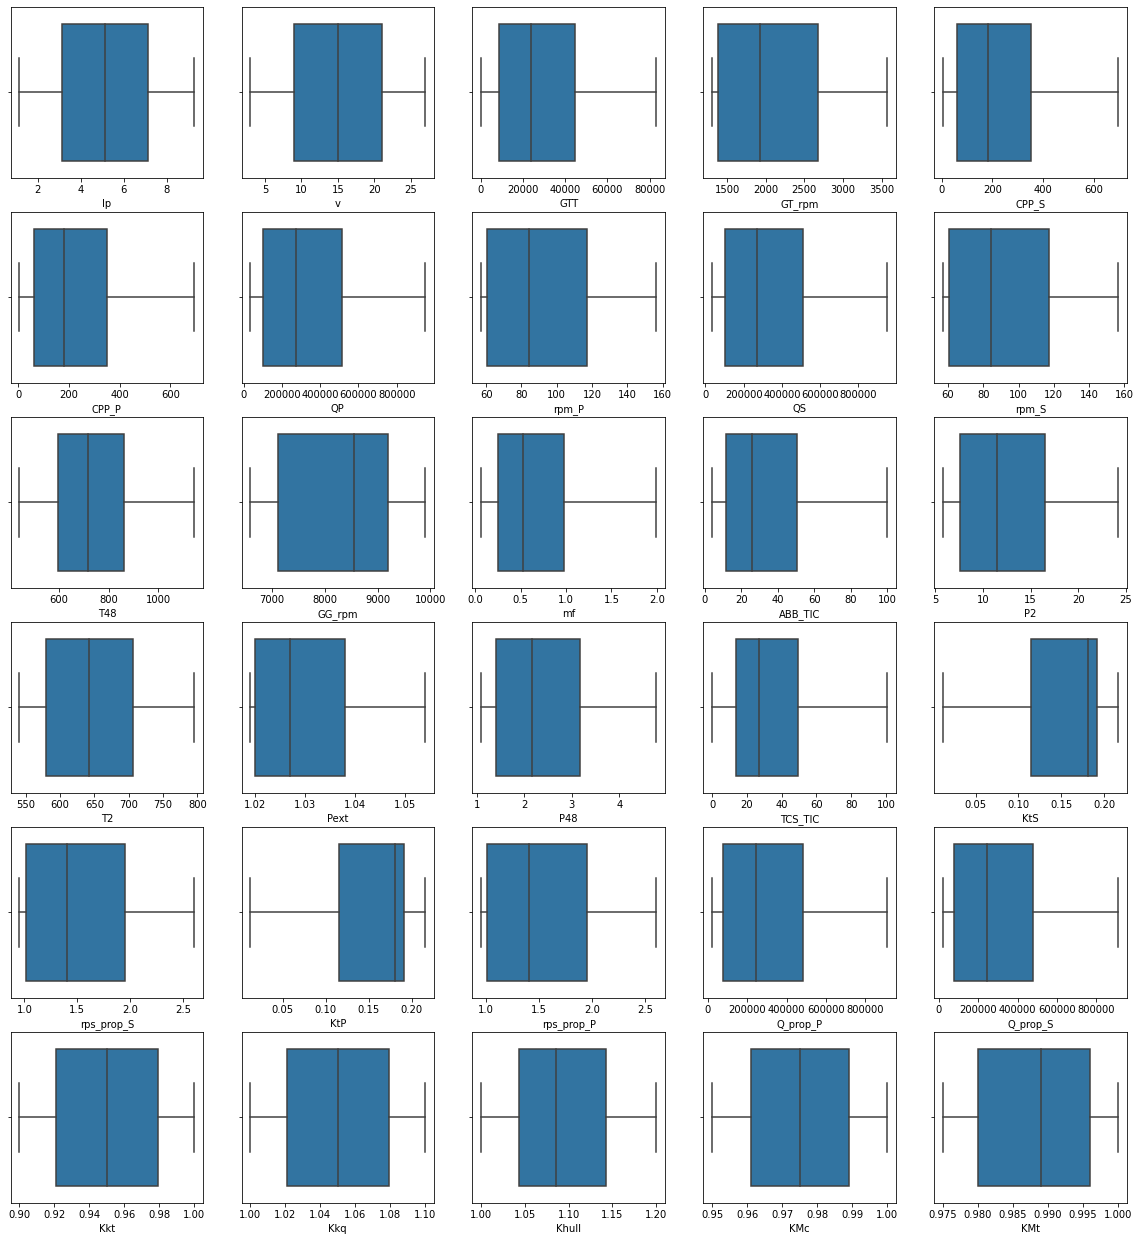

In [57]:
# Analyzing the data distribution and look for outliers/anomalies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(20, 22))

icount =1
for col in nps.columns:
    plt.subplot(6,5, icount)
    sns.boxplot(nps[col])
    icount = icount+1
    
plt.show()

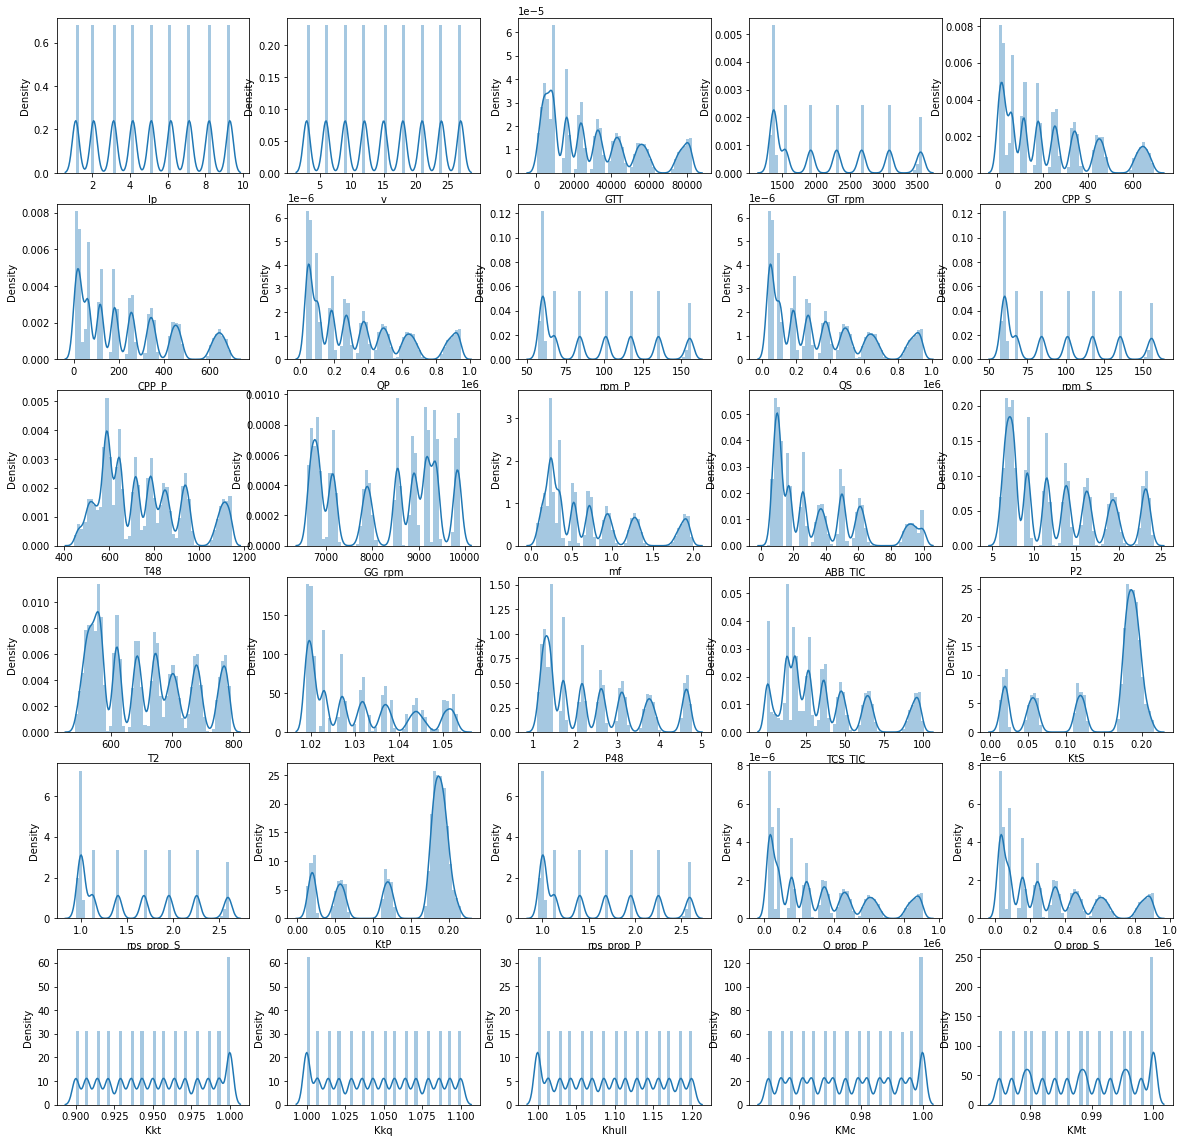

In [58]:
# Analyzing the data distribution and look for outliers/anomalies

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(20,20))

icount =1
for col in nps.columns:
    plt.subplot(6,5, icount)
    sns.distplot(nps[col])
    icount +=1
    
plt.show()

### Check outliers using unsupervised models

#### Isolation Forest

In [4]:
to_model_columns=nps.columns[0:30]

from sklearn.ensemble import IsolationForest

clf=IsolationForest(n_estimators=100, max_samples=256, contamination=float(0.01), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=0, verbose=0)
clf.fit(nps[to_model_columns])

pred = clf.predict(nps[to_model_columns])
nps['anomaly']=pred
outliers=nps.loc[nps['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(nps['anomaly'].value_counts())

 1    583330
-1      5893
Name: anomaly, dtype: int64


In [5]:
nps['scores']=clf.decision_function(nps[to_model_columns])
nps['anomaly']=clf.predict(nps[to_model_columns])
nps.head(10)

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,rps_prop_P,Q_prop_P,Q_prop_S,Kkt,Kkq,Khull,KMc,KMt,anomaly,scores
0,1.138,3,7252.5,1357.6,7.800,7.800,40835.0,59.448,40835.0,59.448,...,0.991,26763.0,26763.0,0.900,1.100,1.0,1.0,1.0,1,0.060455
1,2.088,6,3919.9,1378.8,27.759,27.759,62949.0,60.379,62949.0,60.379,...,1.006,45078.0,45078.0,0.900,1.100,1.0,1.0,1.0,1,0.084937
2,3.144,9,9446.5,1386.7,58.429,58.429,107870.0,60.725,107870.0,60.725,...,1.012,84240.0,84240.0,0.900,1.100,1.0,1.0,1.0,1,0.115812
3,4.161,12,16777.0,1547.5,108.870,108.870,191560.0,67.765,191560.0,67.765,...,1.129,163560.0,163560.0,0.900,1.100,1.0,1.0,1.0,1,0.078492
4,5.140,15,24683.0,1924.8,168.150,168.150,281840.0,84.289,281840.0,84.289,...,1.405,252740.0,252740.0,0.900,1.100,1.0,1.0,1.0,1,0.083592
5,6.175,18,34064.0,2308.8,236.930,236.930,389020.0,101.100,389020.0,101.100,...,1.685,358700.0,358700.0,0.900,1.100,1.0,1.0,1.0,1,0.067564
6,7.148,21,44727.0,2678.3,318.280,318.280,510810.0,117.280,510810.0,117.280,...,1.955,479960.0,479960.0,0.900,1.100,1.0,1.0,1.0,1,0.041646
7,8.206,24,58397.0,3088.2,418.780,418.780,666790.0,135.230,666790.0,135.230,...,2.254,633960.0,633960.0,0.900,1.100,1.0,1.0,1.0,1,0.042061
8,9.300,27,82647.0,3560.2,605.650,605.650,943620.0,155.900,943620.0,155.900,...,2.598,903980.0,903980.0,0.900,1.100,1.0,1.0,1.0,-1,-0.017131
9,1.138,3,7107.1,1350.2,7.423,7.423,40163.0,59.125,40163.0,59.125,...,0.985,26211.0,26211.0,0.907,1.093,1.0,1.0,1.0,1,0.060361


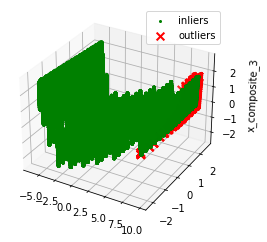

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

#normalize the metrics
X = scaler.fit_transform(nps[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

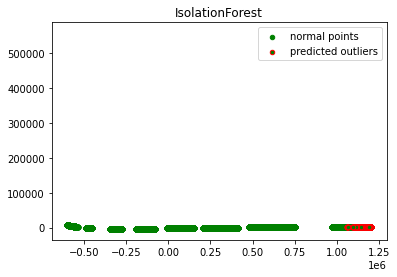

In [7]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(nps[to_model_columns])
res=pd.DataFrame(pca.transform(nps[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

## Splitting the dataset into the Training, Test and Validation Set

In [7]:
# Split the data into X and y

# X parameters are from 1st to 25th collumns
X = nps.iloc[:,0:25]

# y parameters are from 25th to 30th collumns
# Collumn 26th (Kkq) is not used
y1 = nps['Kkt']
y2 = nps['Khull']
y3 = nps['KMc']
y4 = nps['KMt']

In [8]:
# Splitting the X and y into training and test set
# Training size = 70% and test set = 30%, random_state is set 0

X_train1, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state=0)
X_train1, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3, random_state=0)
X_train1, X_test, y3_train, y3_test = train_test_split(X, y3, test_size = 0.3, random_state=0)
X_train1, X_test, y4_train, y4_test = train_test_split(X, y4, test_size = 0.3, random_state=0)

# Splitting the X and y into training and validation set
# Validation size = 20% and Test set = 10%, random_state is set 0

X_train, X_val, y1_train, y1_val = train_test_split(X_train1, y1_train, test_size=0.2, random_state=0)
X_train, X_val, y2_train, y2_val = train_test_split(X_train1, y2_train, test_size=0.2, random_state=0)
X_train, X_val, y3_train, y3_val = train_test_split(X_train1, y3_train, test_size=0.2, random_state=0)
X_train, X_val, y4_train, y4_val = train_test_split(X_train1, y4_train, test_size=0.2, random_state=0)

# Check the shape of all train and test dataset
# Check the shape of all train and test dataset
print ("This is our first train, test and validation shape:")
print (X_train.shape, y1_train.shape)
print (X_test.shape, y1_test.shape)
print (X_val.shape, y1_val.shape,"\n")

print ("This is our second train and test shape:")
print (X_train.shape, y2_train.shape)
print (X_test.shape, y2_test.shape)
print (X_val.shape, y2_val.shape,"\n")

print ("This is our third train and test shape:")
print (X_train.shape, y3_train.shape)
print (X_test.shape, y3_test.shape)
print (X_val.shape, y3_val.shape,"\n")

print ("This is our fourth train and test shape:")
print (X_train.shape, y4_train.shape)
print (X_test.shape, y4_test.shape)
print (X_val.shape, y4_val.shape,"\n")

This is our first train, test and validation shape:
(329964, 25) (329964,)
(176767, 25) (176767,)
(82492, 25) (82492,) 

This is our second train and test shape:
(329964, 25) (329964,)
(176767, 25) (176767,)
(82492, 25) (82492,) 

This is our third train and test shape:
(329964, 25) (329964,)
(176767, 25) (176767,)
(82492, 25) (82492,) 

This is our fourth train and test shape:
(329964, 25) (329964,)
(176767, 25) (176767,)
(82492, 25) (82492,) 



In [30]:
# Print the x_train dataset
X_train

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,T2,Pext,P48,TCS_TIC,KtS,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S
414662,4.161,12,16781.0,1547.4,118.270,118.270,191600.0,67.761,191600.0,67.761,...,613.54,1.023,1.729,18.383,0.182,1.129,0.182,1.129,163600.0,163600.0
209700,6.175,18,32540.0,2308.2,245.090,245.090,371540.0,101.070,371540.0,101.070,...,673.45,1.031,2.606,36.504,0.180,1.685,0.180,1.685,341770.0,341770.0
524657,2.088,6,6090.3,1348.0,26.224,26.224,60038.0,59.030,60038.0,59.030,...,567.96,1.020,1.304,22.469,0.054,0.984,0.054,0.984,42412.0,42412.0
450492,7.148,21,47301.0,2678.0,342.680,342.680,540070.0,117.270,540070.0,117.270,...,714.38,1.038,3.236,51.812,0.188,1.954,0.188,1.954,508330.0,508330.0
76688,6.175,18,32796.0,2308.7,239.810,239.810,374540.0,101.100,374540.0,101.100,...,677.50,1.031,2.603,36.706,0.176,1.685,0.176,1.685,344680.0,344680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278950,5.140,15,22326.0,1924.4,180.610,180.610,254940.0,84.269,254940.0,84.269,...,635.43,1.027,2.111,25.160,0.186,1.404,0.186,1.404,227070.0,227070.0
190441,9.300,27,75849.0,3560.6,637.650,637.650,865840.0,155.920,865840.0,155.920,...,773.17,1.052,4.596,90.009,0.198,2.599,0.198,2.599,829250.0,829250.0
555600,3.144,9,9308.2,1386.7,66.834,66.834,106280.0,60.724,106280.0,60.724,...,579.43,1.021,1.423,12.534,0.126,1.012,0.126,1.012,82764.0,82764.0
507341,1.138,3,2140.3,1405.4,12.119,12.119,41501.0,61.541,41501.0,61.541,...,556.81,1.019,1.175,0.000,0.024,1.026,0.024,1.026,27459.0,27459.0


In [31]:
# Print y1_train & y2_test dataset
print("y1_train:\n", y1_train, "\n")
print("y2_test:\n", y2_test)

y1_train:
 414662    0.936
209700    0.943
524657    0.914
450492    0.900
76688     0.929
          ...  
278950    0.993
190441    0.971
555600    0.964
507341    0.971
509386    0.986
Name: Kkt, Length: 329964, dtype: float64 

y2_test:
 535215    1.186
4006      1.000
485611    1.157
373827    1.100
563596    1.200
          ...  
87958     1.000
550145    1.186
415914    1.129
206171    1.029
97153     1.000
Name: Khull, Length: 176767, dtype: float64


### Comparing Scores with and without Reduced Outliers

In [11]:
# identify outliers in the training dataset
iso = IsolationForest(n_estimators=100, max_samples=256, contamination=float(0.01), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=0, verbose=0)
y_pred_train = iso.fit_predict(X_train, y1_train)
X_train_cleaned = X_train[np.where(y_pred_train == 1, True, False)]
y1_train_cleaned = y1_train[np.where(y_pred_train == 1, True, False)]

print(X_train_cleaned.shape, y1_train_cleaned.shape)

(326665, 25) (326665,)


In [12]:
from sklearn.metrics import mean_absolute_error as mae

# normal dataset
LR1 = LinearRegression()
LR1.fit(X_train, y1_train)
y1_pred_LR = LR1.predict(X_val)
r2score_y1_pred_LR = r2_score(y1_val, y1_pred_LR)
mse_y1_pred_LR = mean_squared_error(y1_val, y1_pred_LR, squared=False)
mae_y1_pred_LR = mae(y1_val, y1_pred_LR)

# reduced dataset
LR2 = LinearRegression()
LR2.fit(X_train_cleaned, y1_train_cleaned)
y1_pred_cleaned_LR = LR2.predict(X_val)
r2_cle_LR = r2_score(y1_val, y1_pred_cleaned_LR)
mse_cle_LR = mean_squared_error(y1_val, y1_pred_cleaned_LR, squared=False)
mae_cle_LR = mae(y1_val, y1_pred_cleaned_LR)

print("Scores for dataset " '\033[1m' + 'without' + '\033[0m', "reduced outliers using linear regression")
print("R2-Score for LR: ", r2score_y1_pred_LR)
print("RMSE-Score for LR: ", mse_y1_pred_LR)
print("MAE-Score for LR: ", mae_y1_pred_LR, "\n")

print("Scores for dataset " '\033[1m' + 'with' + '\033[0m', "reduced outliers using linear regression")
print("R2-Score for LR: ", r2_cle_LR)
print("RMSE-Score for LR: ", mse_cle_LR)
print("MAE-Score for LR: ", mae_cle_LR)

Scores for dataset without reduced outliers using linear regression
R2-Score for LR:  0.8155370741181225
RMSE-Score for LR:  0.013832245968839021
MAE-Score for LR:  0.010662451021037063 

Scores for dataset with reduced outliers using linear regression
R2-Score for LR:  0.8152814248045506
RMSE-Score for LR:  0.013841827785352704
MAE-Score for LR:  0.010690023371536007


In [13]:
# normal dataset
RF1 = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0)
RF1.fit(X_train, y1_train)
y1_pred_RF = RF1.predict(X_val)
r2score_y1_pred_RF = r2_score(y1_val, y1_pred_RF)
mse_y1_pred_RF = mean_squared_error(y1_val, y1_pred_RF, squared=False)
mae_y1_pred_RF = mae(y1_val, y1_pred_LR)

# reduced dataset
RF2 = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0)
RF2.fit(X_train_cleaned, y1_train_cleaned)
y1_pred_cleaned_LR = RF2.predict(X_val)
r2_cle_RF = r2_score(y1_val, y1_pred_cleaned_LR)
mse_cle_RF = mean_squared_error(y1_val, y1_pred_cleaned_LR, squared=False)
mae_cle_RF = mae(y1_val, y1_pred_cleaned_LR)


print("Scores for dataset " '\033[1m' + 'without' + '\033[0m', "reduced outliers using random forest")
print("R2-Score for RF: ", r2score_y1_pred_RF)
print("RMSE-Scorefor RF: ", mse_y1_pred_RF)
print("MAE-Score for RF: ", mae_y1_pred_RF, "\n")

print("Scores for dataset " '\033[1m' + 'with' + '\033[0m', "reduced outliers using random forest")
print("R2-Score for RF: ", r2_cle_RF)
print("RMSE-Scorefor RF: ", mse_cle_RF)
print("MAE-Score for RF: ", mae_cle_RF)

Scores for dataset without reduced outliers using random forest
R2-Score for RF:  0.1804332953449611
RMSE-Scorefor RF:  0.02915615899799197
MAE-Score for RF:  0.010662451021037063 

Scores for dataset with reduced outliers using random forest
R2-Score for RF:  0.21023042248491175
RMSE-Scorefor RF:  0.0286212341596797
MAE-Score for RF:  0.023793659294757904


In [15]:
# normal dataset
KNN1 = KNeighborsRegressor(n_neighbors = 2, algorithm='auto') 
KNN1.fit(X_train, y1_train)
y1_pred_KNN = KNN1.predict(X_val)
r2score_y1_pred_KNN = r2_score(y1_val, y1_pred_KNN)
mse_y1_pred_KNN = mean_squared_error(y1_val, y1_pred_KNN, squared=False)
mae_y1_pred_KNN = mae(y1_val, y1_pred_KNN)

# reduced dataset
KNN2 = KNeighborsRegressor(n_neighbors = 2, algorithm='auto') 
KNN2.fit(X_train_cleaned, y1_train_cleaned)
y1_pred_cleaned_KNN = KNN2.predict(X_val)
r2_cle_KNN = r2_score(y1_val, y1_pred_cleaned_KNN)
mse_cle_KNN = mean_squared_error(y1_val, y1_pred_cleaned_KNN, squared=False)
mae_cle_KNN = mae(y1_val, y1_pred_cleaned_KNN)


print("Scores for dataset " '\033[1m' + 'without' + '\033[0m', "reduced outliers using K-nearest neighbors")
print("R2-Score for KNN: ", r2score_y1_pred_KNN)
print("RMSE-Scorefor KNN: ", mse_y1_pred_KNN)
print("MAE-Score for KNN: ", mae_y1_pred_KNN, "\n")

print("Scores for dataset " '\033[1m' + 'with' + '\033[0m', "reduced outliers using K-nearest neighbors")
print("R2-Score for KNN: ", r2_cle_KNN)
print("RMSE-Scorefor KNN: ", mse_cle_KNN)
print("MAE-Score for KNN: ", mae_cle_KNN)

Scores for dataset without reduced outliers using K-nearest neighbors
R2-Score for KNN:  0.9679765058512874
RMSE-Scorefor KNN:  0.005763317096836411
MAE-Score for KNN:  0.002391874363574649 

Scores for dataset with reduced outliers using K-nearest neighbors
R2-Score for KNN:  0.9672303838710955
RMSE-Scorefor KNN:  0.005830070863762069
MAE-Score for KNN:  0.0024332662561218055


## Choosing best models

In [10]:
models = []

models.append(('LR', LinearRegression())) # Linear Regression Model
models.append(('MLP', MLPRegressor()))   
models.append(('KNN', KNeighborsRegressor())) # KNN Regression Model

models.append(('DT', DecisionTreeRegressor())) # Decision Tree Regression Model
models.append(('RF', RandomForestRegressor())) # Random Forest Regression Model
models.append(('XGB', XGBRegressor())) # XGBoost Regression Model

models.append(('PipelineSVR', Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',SVR(kernel='poly', epsilon=0.2 ))]))) # Support Vector Regression Model 1
models.append(('LinearSVR', make_pipeline(StandardScaler(),
                            LinearSVR(random_state=0, tol=1e-5)))) # Support Vector Regression Model 2
models.append(('SGDRegressorSVR', make_pipeline(StandardScaler(),
                            SGDRegressor(max_iter=1000, tol=1e-3)))) # Support Vector Regression Model 3

In [9]:
for name, model in models:
    if name=='SVR':
        sc = StandardScaler()
        X_trainSVR = sc.fit_transform(X_val)
        y1_trainSVR = sc.fit_transform(y1_val)
        model.fit(X_trainSVR.reshape(-1, 1), y1_trainSVR)
        scores = model.score(X_trainSVR, y1_trainSVR)
        print(name,"Score: {:.2f} %".format(scores*100))
        
    else:
        model.fit(X_train, y1_train)
        scores = model.score(X_val, y1_val)
        print(name,"Score: {:.2f} %".format(scores*100))

LR Score: 81.55 %
MLP Score: -51813833122.11 %
KNN Score: 96.40 %
DT Score: 99.91 %
RF Score: 99.98 %
[20:24:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Score: 86.47 %
PipelineSVR Score: -0.89 %


C:\Users\ASUS\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR Score: 74.58 %
SGDRegressorSVR Score: 66.41 %


## Adjusting best parameters

### Optimal k values for KNN Regression Model

In [164]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_val) #make prediction on validation set
    error = sqrt(mean_squared_error(y1_val,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.005995517082662128
RMSE value for k=  2 is: 0.005763317096836411
RMSE value for k=  3 is: 0.005849660582870796
RMSE value for k=  4 is: 0.005972722032878693
RMSE value for k=  5 is: 0.006109632673470824
RMSE value for k=  6 is: 0.006246367615903053
RMSE value for k=  7 is: 0.00637884433120891
RMSE value for k=  8 is: 0.0064986474554092335
RMSE value for k=  9 is: 0.006645202403164313
RMSE value for k=  10 is: 0.006782944544015812
RMSE value for k=  11 is: 0.006904744340166661
RMSE value for k=  12 is: 0.007031094296308945
RMSE value for k=  13 is: 0.007155492698973711
RMSE value for k=  14 is: 0.007280627890186521
RMSE value for k=  15 is: 0.007401786831708783
RMSE value for k=  16 is: 0.007525291079805029
RMSE value for k=  17 is: 0.0076366779345812
RMSE value for k=  18 is: 0.007748492020895402
RMSE value for k=  19 is: 0.007864525923534555
RMSE value for k=  20 is: 0.00797636816959259


<AxesSubplot:>

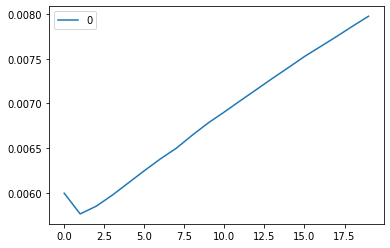

In [165]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### Optimal n estimators for Random Forest Regression Model

In [ ]:
rmse_val = [] #to store rmse values for different k
for n in range(9,101,10):
    n = n+1
    model = RandomForestRegressor(n_estimators = n)

    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_val) #make prediction on test set
    error = sqrt(mean_squared_error(y1_val,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , n , 'is:', error)

<AxesSubplot:>

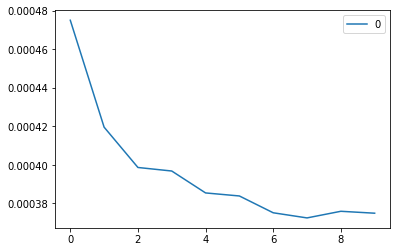

In [66]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### Optimal max_depth for Random Forest Regression Model

In [22]:
rmse_val = [] #to store rmse values for different k

for max_depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
#Define tree
    model = RandomForestRegressor(max_depth= max_leaf_nodes, random_state=0)
    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , max_leaf_nodes , 'is:', error)

RMSE value for n=  1 is: 0.03162371390312014
RMSE value for n=  2 is: 0.03011144577445102
RMSE value for n=  3 is: 0.02920437951280845
RMSE value for n=  4 is: 0.028474429088559888
RMSE value for n=  5 is: 0.027439259798129213
RMSE value for n=  6 is: 0.02672237734191777
RMSE value for n=  7 is: 0.02550932570182999
RMSE value for n=  8 is: 0.024695560411766432
RMSE value for n=  9 is: 0.023137128038461813
RMSE value for n=  10 is: 0.022189682380204016


### Optimal max_depth for XGBoost Model

In [13]:
# XGB gbtree
rmse_val = [] #to store rmse values for different k

for max_leaf_nodes in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
#Define tree
    model = XGBRegressor(max_depth= max_leaf_nodes, booster= 'gbtree', verbosity=0)
    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , max_leaf_nodes , 'is:', error)

RMSE value for n=  1 is: 0.028232496480328342
RMSE value for n=  2 is: 0.01838986488287582
RMSE value for n=  3 is: 0.011875568556059287
RMSE value for n=  4 is: 0.007471034251296124
RMSE value for n=  5 is: 0.0047968268467958606
RMSE value for n=  6 is: 0.003025533657760847
RMSE value for n=  7 is: 0.001998745539346711
RMSE value for n=  8 is: 0.001522860150362966
RMSE value for n=  9 is: 0.0011726771987062572
RMSE value for n=  10 is: 0.000923057939239014


In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [14]:
# XGB gblinear
rmse_val = [] #to store rmse values for different k

for max_leaf_nodes in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
#Define tree
    model = XGBRegressor(max_depth= max_leaf_nodes, booster= 'gblinear', verbosity=0)
    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , max_leaf_nodes , 'is:', error)

RMSE value for n=  1 is: 0.034186724308432344
RMSE value for n=  2 is: 0.034186724308432344
RMSE value for n=  3 is: 0.034186724308432344
RMSE value for n=  4 is: 0.034186724308432344
RMSE value for n=  5 is: 0.034186724308432344
RMSE value for n=  6 is: 0.034186724308432344
RMSE value for n=  7 is: 0.034186724308432344
RMSE value for n=  8 is: 0.034186724308432344
RMSE value for n=  9 is: 0.034186724308432344
RMSE value for n=  10 is: 0.034186724308432344


In [16]:
# XGB gbtree
rmse_val = [] #to store rmse values for different k

for max_leaf_nodes in [10,15,20]:
#Define tree
    model = XGBRegressor(max_depth= max_leaf_nodes, booster= 'gbtree', verbosity=0)
    model.fit(X_train, y1_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y1_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , max_leaf_nodes , 'is:', error)

RMSE value for n=  10 is: 0.000923057939239014
RMSE value for n=  15 is: 0.0005110202679544791
RMSE value for n=  20 is: 0.00041708590561135737


## Select best of the best model for y1

In [28]:
for name, model in models:
    if name=='SVR':
        sc = StandardScaler()
        X_trainSVR = sc.fit_transform(X_train)
        y1_trainSVR = sc.fit_transform(y1_train)
        model.fit(X_trainSVR.reshape(-1, 1), y1_trainSVR)
        scores = model.score(X_trainSVR, y1_trainSVR)
        print(name,"Score: {:.2f} %".format(scores*100))
        
    else:
        model.fit(X_train, y1_train)
        scores = model.score(X_train, y1_train)
        print(name,"Score: {:.2f} %".format(scores*100))

LR Score: 81.60 %
PipelineSVR Score: -0.93 %
RF Score: 100.00 %
KNN Score: 99.25 %
DT Score: 100.00 %


In [11]:
## Highest score for training = RF
RF_y1 = RandomForestRegressor(n_estimators=80, random_state=0)
RF_y1.fit(X_train, y1_train)

# ## 2rd highest score = KNN
KNN_y1 = KNeighborsRegressor(n_neighbors = 2, algorithm='auto') 
KNN_y1.fit(X_train, y1_train)

# ## 3rd highest score = XGB
XGB_y1 = XGBRegressor()
XGB_y1.fit(X_train, y1_train)

[22:44:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [9]:
results = X_test.copy()
results

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,T2,Pext,P48,TCS_TIC,KtS,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S
535215,6.175,18,34800.0,2308.2,265.630,265.630,397320.0,101.080,397320.0,101.080,...,680.46,1.032,2.681,38.572,0.194,1.685,0.194,1.685,366770.0,366770.0
4006,3.144,9,8676.0,1386.8,59.822,59.822,99063.0,60.726,99063.0,60.726,...,577.24,1.021,1.400,11.816,0.113,1.012,0.113,1.012,76148.0,76148.0
485611,2.088,6,4124.1,1383.7,32.273,32.273,63507.0,60.593,63507.0,60.593,...,562.00,1.020,1.248,0.505,0.063,1.010,0.063,1.010,45592.0,45592.0
373827,2.088,6,6416.2,1351.8,25.613,25.613,56665.0,59.196,56665.0,59.196,...,567.59,1.020,1.313,20.785,0.052,0.987,0.052,0.987,39613.0,39613.0
563596,4.161,12,15946.0,1547.3,125.520,125.520,182090.0,67.758,182090.0,67.758,...,614.12,1.023,1.701,18.422,0.193,1.129,0.193,1.129,154850.0,154850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87958,1.138,3,3956.3,1325.7,6.221,6.221,36240.0,58.051,36240.0,58.051,...,563.26,1.019,1.225,27.972,0.014,0.968,0.014,0.968,23133.0,23133.0
550145,4.161,12,17883.0,1547.3,119.220,119.220,204190.0,67.758,204190.0,67.758,...,610.43,1.024,1.774,18.552,0.184,1.129,0.184,1.129,175280.0,175280.0
415914,7.148,21,43096.0,2677.9,350.640,350.640,491990.0,117.270,491990.0,117.270,...,705.96,1.036,3.101,48.576,0.192,1.954,0.192,1.954,461670.0,461670.0
206171,3.144,9,9230.2,1386.8,60.155,60.155,105390.0,60.726,105390.0,60.726,...,584.22,1.021,1.416,12.724,0.114,1.012,0.114,1.012,81940.0,81940.0


In [10]:
y1_pred_RF = RF_y1.predict(X_test)

results["predicted"] = y1_pred_RF
results["actual"] = y1_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-10-b393d9a342d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['predicted'] = results['predicted'].round(3)


,predicted,actual
535215,0.936,0.936
4006,0.971,0.971
485611,0.944,0.943
373827,0.957,0.957
563596,0.993,0.993
...,...,...
87958,0.986,0.986
550145,0.900,0.900
415914,0.964,0.964
206171,0.929,0.929


In [11]:
y1_pred_KNN = KNN_y1.predict(X_test)

results["predicted"] = y1_pred_KNN 
results["actual"] = y1_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-11-d0698caadb5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["predicted"] = y1_pred_KNN
<ipython-input-11-d0698caadb5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["actual"] = y1_test


,predicted,actual
535215,0.929,0.936
4006,0.971,0.971
485611,0.936,0.943
373827,0.957,0.957
563596,0.993,0.993
...,...,...
87958,0.975,0.986
550145,0.900,0.900
415914,0.964,0.964
206171,0.929,0.929


In [12]:
y1_pred_XGB = XGB_y1.predict(X_test)

results["predicted"] = y1_pred_XGB
results["actual"] = y1_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
535215,0.939,0.936
4006,0.962,0.971
485611,0.938,0.943
373827,0.960,0.957
563596,0.987,0.993
...,...,...
87958,0.978,0.986
550145,0.926,0.900
415914,0.958,0.964
206171,0.939,0.929


In [13]:
r2score_y1_pred_RF = r2_score(y1_test, y1_pred_RF)
mse_y1_pred_RF = mean_squared_error(y1_test, y1_pred_RF, squared=False)
mae_y1_pred_RF = mae(y1_test, y1_pred_RF)

r2score_y1_pred_KNN = r2_score(y1_test, y1_pred_KNN)
mse_y1_pred_KNN = mean_squared_error(y1_test, y1_pred_KNN, squared=False)
mae_y1_pred_KNN = mae(y1_test, y1_pred_KNN)

r2score_y1_pred_XGB = r2_score(y1_test, y1_pred_XGB)
mse_y1_pred_XGB = mean_squared_error(y1_test, y1_pred_XGB, squared=False)
mae_y1_pred_XGB = mae(y1_test, y1_pred_XGB)#RMSE atau MSE?

print("R2-Score for RF: {:.5f} %".format(r2score_y1_pred_RF*100))
print("MSE for RF: {:.5f} %".format(mse_y1_pred_RF*100))
print("MAE for RF: {:.5f} %".format(mae_y1_pred_RF*100), "\n")

print("R2-Score for KNN: {:.5f} %".format(r2score_y1_pred_KNN*100))
print("MSE for KNN: {:.5f} %".format(mse_y1_pred_KNN*100))
print("MAE for KNN: {:.5f} %".format(mae_y1_pred_KNN*100), "\n")

print("R2-Score for XGB: {:.5f} %".format(r2score_y1_pred_XGB*100))
print("MSE for XGB: {:.5f} %".format(mse_y1_pred_XGB*100))
print("MAE for XGB: {:.5f} %".format(mae_y1_pred_XGB*100), "\n")

R2-Score for RF: 99.98309 %
MSE for RF: 0.04201 %
MAE for RF: 0.01310 % 

R2-Score for KNN: 96.78436 %
MSE for KNN: 0.57918 %
MAE for KNN: 0.24012 % 

R2-Score for XGB: 86.48098 %
MSE for XGB: 1.18756 %
MAE for XGB: 0.91925 % 



In [14]:
cutoff = 0.95                              # decide on a cutoff limit
y1_pred_cls_RF = np.zeros_like(y1_pred_RF)    # initialise a matrix full with zeros
y1_pred_cls_RF[y1_pred_RF >= cutoff] = 1       # add a 1 if the cutoff was breached
y1_test_cls_RF = np.zeros_like(y1_test)
y1_test_cls_RF[y1_test > cutoff] = 1
Matrix=(confusion_matrix(y1_test_cls_RF, y1_pred_cls_RF))
TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y1_test_cls_RF,y1_pred_cls_RF)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 100.00 %
Specificity for RF: 91.23 %


In [15]:
cutoff = 0.95                              # decide on a cutoff limit
y1_pred_cls_KNN = np.zeros_like(y1_pred_KNN)    # initialise a matrix full with zeros
y1_pred_cls_KNN[y1_pred_KNN >= cutoff] = 1       # add a 1 if the cutoff was breached
y1_test_cls_KNN = np.zeros_like(y1_test)
y1_test_cls_KNN[y1_test > cutoff] = 1
Matrix=(confusion_matrix(y1_test_cls_KNN, y1_pred_cls_KNN))
TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for KNN: {:.2f} %".format(recall_score(y1_test_cls_KNN,y1_pred_cls_KNN)*100))
print("Specificity for KNN: {:.2f} %".format(Specificity) )

Sensitivity for KNN: 98.86 %
Specificity for KNN: 88.93 %


In [16]:
cutoff = 0.95                              # decide on a cutoff limit
y1_pred_cls_XGB = np.zeros_like(y1_pred_XGB)    # initialise a matrix full with zeros
y1_pred_cls_XGB[y1_pred_XGB >= cutoff] = 1       # add a 1 if the cutoff was breached
y1_test_cls_XGB = np.zeros_like(y1_test)
y1_test_cls_XGB[y1_test > cutoff] = 1
Matrix=(confusion_matrix(y1_test_cls_XGB, y1_pred_cls_XGB))
TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for XGB: {:.2f} %".format(recall_score(y1_test_cls_XGB,y1_pred_cls_XGB)*100))
print("Specificity for XGB: {:.2f} %".format(Specificity) )

Sensitivity for XGB: 97.55 %
Specificity for XGB: 90.94 %


## Select best of the best model for y2

In [17]:
## Highest score for training = RF
RF_y2 = RandomForestRegressor(n_estimators=80, random_state=0)
RF_y2.fit(X_train, y2_train)

# ## 2rd highest score = KNN
KNN_y2 = KNeighborsRegressor(n_neighbors = 2, algorithm='auto') 
KNN_y2.fit(X_train, y2_train)

# ## 3rd highest score = XGB
XGB_y2 = XGBRegressor()
XGB_y2.fit(X_train, y2_train)

[21:46:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [18]:
results = X_test.copy()
results

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,T2,Pext,P48,TCS_TIC,KtS,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S
535215,6.175,18,34800.0,2308.2,265.630,265.630,397320.0,101.080,397320.0,101.080,...,680.46,1.032,2.681,38.572,0.194,1.685,0.194,1.685,366770.0,366770.0
4006,3.144,9,8676.0,1386.8,59.822,59.822,99063.0,60.726,99063.0,60.726,...,577.24,1.021,1.400,11.816,0.113,1.012,0.113,1.012,76148.0,76148.0
485611,2.088,6,4124.1,1383.7,32.273,32.273,63507.0,60.593,63507.0,60.593,...,562.00,1.020,1.248,0.505,0.063,1.010,0.063,1.010,45592.0,45592.0
373827,2.088,6,6416.2,1351.8,25.613,25.613,56665.0,59.196,56665.0,59.196,...,567.59,1.020,1.313,20.785,0.052,0.987,0.052,0.987,39613.0,39613.0
563596,4.161,12,15946.0,1547.3,125.520,125.520,182090.0,67.758,182090.0,67.758,...,614.12,1.023,1.701,18.422,0.193,1.129,0.193,1.129,154850.0,154850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87958,1.138,3,3956.3,1325.7,6.221,6.221,36240.0,58.051,36240.0,58.051,...,563.26,1.019,1.225,27.972,0.014,0.968,0.014,0.968,23133.0,23133.0
550145,4.161,12,17883.0,1547.3,119.220,119.220,204190.0,67.758,204190.0,67.758,...,610.43,1.024,1.774,18.552,0.184,1.129,0.184,1.129,175280.0,175280.0
415914,7.148,21,43096.0,2677.9,350.640,350.640,491990.0,117.270,491990.0,117.270,...,705.96,1.036,3.101,48.576,0.192,1.954,0.192,1.954,461670.0,461670.0
206171,3.144,9,9230.2,1386.8,60.155,60.155,105390.0,60.726,105390.0,60.726,...,584.22,1.021,1.416,12.724,0.114,1.012,0.114,1.012,81940.0,81940.0


In [20]:
y2_pred_RF = RF_y2.predict(X_test)

results["predicted"] = y2_pred_RF
results["actual"] = y2_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-20-3c7127950be2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["predicted"] = y2_pred_RF
<ipython-input-20-3c7127950be2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["actual"] = y2_test


,predicted,actual
535215,1.186,1.186
4006,1.000,1.000
485611,1.162,1.157
373827,1.100,1.100
563596,1.200,1.200
...,...,...
87958,1.001,1.000
550145,1.186,1.186
415914,1.129,1.129
206171,1.029,1.029


In [21]:
y2_pred_KNN = KNN_y2.predict(X_test)

results["predicted"] = y2_pred_KNN 
results["actual"] = y2_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
535215,1.157,1.186
4006,1.000,1.000
485611,1.128,1.157
373827,1.100,1.100
563596,1.200,1.200
...,...,...
87958,1.072,1.000
550145,1.186,1.186
415914,1.129,1.129
206171,1.029,1.029


In [22]:
y2_pred_XGB = XGB_y2.predict(X_test)

results["predicted"] = y2_pred_XGB 
results["actual"] = y2_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
535215,1.170,1.186
4006,1.036,1.000
485611,1.133,1.157
373827,1.103,1.100
563596,1.179,1.200
...,...,...
87958,1.031,1.000
550145,1.148,1.186
415914,1.142,1.129
206171,1.036,1.029


In [23]:
r2score_y2_pred_RF = r2_score(y2_test, y2_pred_RF)
mse_y2_pred_RF = mean_squared_error(y2_test, y2_pred_RF, squared=False)
mae_y2_pred_RF = mae(y2_test, y2_pred_RF)

r2score_y2_pred_KNN = r2_score(y2_test, y2_pred_KNN)
mse_y2_pred_KNN = mean_squared_error(y2_test, y2_pred_KNN, squared=False)
mae_y2_pred_KNN = mae(y2_test, y2_pred_KNN)

r2score_y2_pred_XGB = r2_score(y2_test, y2_pred_XGB)
mse_y2_pred_XGB = mean_squared_error(y2_test, y2_pred_XGB, squared=False)
mae_y2_pred_XGB = mae(y2_test, y2_pred_XGB)

print("R2-Score for RF: {:.5f} %".format(r2score_y2_pred_RF*100))
print("RMSE for RF: {:.5f} %".format(mse_y2_pred_RF*100))
print("MAE for RF: {:.5f} %".format(mae_y2_pred_RF*100), "\n")

print("R2-Score for KNN: {:.5f} %".format(r2score_y2_pred_KNN*100))
print("RMSE for KNN: {:.5f} %".format(mse_y2_pred_KNN*100))
print("MAE for KNN: {:.5f} %".format(mae_y2_pred_KNN*100), "\n")

print("R2-Score for XGB: {:.5f} %".format(r2score_y2_pred_XGB*100))
print("RMSE for XGB: {:.5f} %".format(mse_y2_pred_XGB*100))
print("MAE for XGB: {:.5f} %".format(mae_y2_pred_XGB*100), "\n")

R2-Score for RF: 99.89533 %
RMSE for RF: 0.20862 %
MAE for RF: 0.07221 % 

R2-Score for KNN: 76.89566 %
RMSE for KNN: 3.09954 %
MAE for KNN: 1.36382 % 

R2-Score for XGB: 86.65378 %
RMSE for XGB: 2.35575 %
MAE for XGB: 1.86068 % 



In [24]:
cutoff = 1.1                              # decide on a cutoff limit
y2_pred_cls_RF = np.zeros_like(y2_pred_RF)    # initialise a matrix full with zeros
y2_pred_cls_RF[y2_pred_RF <= cutoff] = 1       # add a 1 if the cutoff was breached
y2_test_cls_RF = np.zeros_like(y2_test)
y2_test_cls_RF[y2_test <= cutoff] = 1
Matrix=(confusion_matrix(y2_test_cls_RF, y2_pred_cls_RF))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y2_test_cls_RF,y2_pred_cls_RF)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 93.50 %
Specificity for RF: 99.99 %


In [25]:
cutoff = 1.1                              # decide on a cutoff limit
y2_pred_cls_KNN = np.zeros_like(y2_pred_KNN)    # initialise a matrix full with zeros
y2_pred_cls_KNN[y2_pred_KNN <= cutoff] = 1       # add a 1 if the cutoff was breached
y2_test_cls_KNN = np.zeros_like(y2_test)
y2_test_cls_KNN[y2_test < cutoff] = 1
Matrix=(confusion_matrix(y2_test_cls_KNN, y2_pred_cls_KNN))
TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y2_test_cls_KNN,y2_pred_cls_KNN)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 93.73 %
Specificity for RF: 82.87 %


In [26]:
cutoff = 1.1                              # decide on a cutoff limit
y2_pred_cls_XGB = np.zeros_like(y2_pred_XGB)    # initialise a matrix full with zeros
y2_pred_cls_XGB[y2_pred_XGB <= cutoff] = 1       # add a 1 if the cutoff was breached
y2_test_cls_XGB = np.zeros_like(y2_test)
y2_test_cls_XGB[y2_test < cutoff] = 1
Matrix=(confusion_matrix(y2_test_cls_XGB, y2_pred_cls_XGB))
TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y2_test_cls_XGB,y2_pred_cls_XGB)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 96.13 %
Specificity for RF: 90.69 %


## Select best of the best model for y3

In [12]:
## Highest score for training = RF
RF_y3 = RandomForestRegressor(n_estimators=80, random_state=0)
RF_y3.fit(X_train, y3_train)

# ## 2rd highest score = KNN
KNN_y3 = KNeighborsRegressor(n_neighbors = 2, algorithm='auto') 
KNN_y3.fit(X_train, y3_train)

# ## 3rd highest score = XGB
XGB_y3 = XGBRegressor()
XGB_y3.fit(X_train, y3_train)

[23:02:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [28]:
results = X_test.copy()
results

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,T2,Pext,P48,TCS_TIC,KtS,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S
535215,6.175,18,34800.0,2308.2,265.630,265.630,397320.0,101.080,397320.0,101.080,...,680.46,1.032,2.681,38.572,0.194,1.685,0.194,1.685,366770.0,366770.0
4006,3.144,9,8676.0,1386.8,59.822,59.822,99063.0,60.726,99063.0,60.726,...,577.24,1.021,1.400,11.816,0.113,1.012,0.113,1.012,76148.0,76148.0
485611,2.088,6,4124.1,1383.7,32.273,32.273,63507.0,60.593,63507.0,60.593,...,562.00,1.020,1.248,0.505,0.063,1.010,0.063,1.010,45592.0,45592.0
373827,2.088,6,6416.2,1351.8,25.613,25.613,56665.0,59.196,56665.0,59.196,...,567.59,1.020,1.313,20.785,0.052,0.987,0.052,0.987,39613.0,39613.0
563596,4.161,12,15946.0,1547.3,125.520,125.520,182090.0,67.758,182090.0,67.758,...,614.12,1.023,1.701,18.422,0.193,1.129,0.193,1.129,154850.0,154850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87958,1.138,3,3956.3,1325.7,6.221,6.221,36240.0,58.051,36240.0,58.051,...,563.26,1.019,1.225,27.972,0.014,0.968,0.014,0.968,23133.0,23133.0
550145,4.161,12,17883.0,1547.3,119.220,119.220,204190.0,67.758,204190.0,67.758,...,610.43,1.024,1.774,18.552,0.184,1.129,0.184,1.129,175280.0,175280.0
415914,7.148,21,43096.0,2677.9,350.640,350.640,491990.0,117.270,491990.0,117.270,...,705.96,1.036,3.101,48.576,0.192,1.954,0.192,1.954,461670.0,461670.0
206171,3.144,9,9230.2,1386.8,60.155,60.155,105390.0,60.726,105390.0,60.726,...,584.22,1.021,1.416,12.724,0.114,1.012,0.114,1.012,81940.0,81940.0


In [29]:
y3_pred_RF = RF_y3.predict(X_test)

results["predicted"] = y3_pred_RF
results["actual"] = y3_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-29-9a9e559222d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['predicted'] = results['predicted'].round(3)


,predicted,actual
535215,0.961,0.961
4006,0.986,0.986
485611,0.980,0.979
373827,0.996,0.996
563596,0.957,0.957
...,...,...
87958,0.976,0.975
550145,0.986,0.986
415914,0.964,0.964
206171,0.968,0.968


In [30]:
y3_pred_KNN = KNN_y3.predict(X_test)

results["predicted"] = y3_pred_KNN
results["actual"] = y3_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-30-32b518e6f6ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["predicted"] = y3_pred_KNN
<ipython-input-30-32b518e6f6ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["actual"] = y3_test


,predicted,actual
535215,0.957,0.961
4006,0.986,0.986
485611,0.986,0.979
373827,1.000,0.996
563596,0.959,0.957
...,...,...
87958,0.970,0.975
550145,0.986,0.986
415914,0.962,0.964
206171,0.971,0.968


In [31]:
y3_pred_XGB = XGB_y3.predict(X_test)

results["predicted"] = y3_pred_XGB
results["actual"] = y3_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
535215,0.969,0.961
4006,0.987,0.986
485611,0.974,0.979
373827,0.990,0.996
563596,0.963,0.957
...,...,...
87958,0.981,0.975
550145,0.979,0.986
415914,0.964,0.964
206171,0.970,0.968


In [32]:
r2score_y3_pred_RF = r2_score(y3_test, y3_pred_RF)
mse_y3_pred_RF = mean_squared_error(y3_test, y3_pred_RF, squared=False)
mae_y3_pred_RF = mae(y3_test, y3_pred_RF)

r2score_y3_pred_KNN = r2_score(y3_test, y3_pred_KNN)
mse_y3_pred_KNN = mean_squared_error(y3_test, y3_pred_KNN, squared=False)
mae_y3_pred_KNN = mae(y3_test, y3_pred_KNN)

r2score_y3_pred_XGB = r2_score(y3_test, y3_pred_XGB)
mse_y3_pred_XGB = mean_squared_error(y3_test, y3_pred_XGB, squared=False)
mae_y3_pred_XGB = mae(y3_test, y3_pred_XGB)

print("R2-Score for RF: {:.5f} %".format(r2score_y3_pred_RF*100))
print("RMSE for RF: {:.5f} %".format(mse_y3_pred_RF*100))
print("MAE for RF: {:.5f} %".format(mae_y3_pred_RF*100), "\n")

print("R2-Score for KNN: {:.5f} %".format(r2score_y3_pred_KNN*100))
print("RMSE for KNN: {:.5f} %".format(mse_y3_pred_KNN*100))
print("MAE for KNN: {:.5f} %".format(mae_y3_pred_KNN*100), "\n")

print("R2-Score for XGB: {:.5f} %".format(r2score_y3_pred_XGB*100))
print("RMSE for XGB: {:.5f} %".format(mse_y3_pred_XGB*100))
print("MAE for XGB: {:.5f} %".format(mae_y3_pred_XGB*100), "\n")

R2-Score for RF: 99.90076 %
RMSE for RF: 0.05061 %
MAE for RF: 0.02623 % 

R2-Score for KNN: 85.29828 %
RMSE for KNN: 0.61595 %
MAE for KNN: 0.40619 % 

R2-Score for XGB: 78.21253 %
RMSE for XGB: 0.74983 %
MAE for XGB: 0.60592 % 



In [33]:
cutoff = 0.98                            # decide on a cutoff limit
y3_pred_cls_RF = np.zeros_like(y3_pred_RF)    # initialise a matrix full with zeros
y3_pred_cls_RF[y3_pred_RF >= cutoff] = 1       # add a 1 if the cutoff was breached
y3_test_cls_RF = np.zeros_like(y3_test)
y3_test_cls_RF[y3_test > cutoff] = 1
Matrix=(confusion_matrix(y3_test_cls_RF, y3_pred_cls_RF))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y3_test_cls_RF,y3_pred_cls_RF)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 99.93 %
Specificity for RF: 99.74 %


In [34]:
cutoff = 0.98                            # decide on a cutoff limit
y3_pred_cls_KNN = np.zeros_like(y3_pred_KNN)    # initialise a matrix full with zeros
y3_pred_cls_KNN[y3_pred_KNN >= cutoff] = 1       # add a 1 if the cutoff was breached
y3_test_cls_KNN = np.zeros_like(y3_test)
y3_test_cls_KNN[y3_test > cutoff] = 1
Matrix=(confusion_matrix(y3_test_cls_KNN, y3_pred_cls_KNN))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for KNN: {:.2f} %".format(recall_score(y3_test_cls_KNN,y3_pred_cls_KNN)*100))
print("Specificity for KNN: {:.2f} %".format(Specificity) )

Sensitivity for KNN: 91.71 %
Specificity for KNN: 88.98 %


In [35]:
cutoff = 0.98                            # decide on a cutoff limit
y3_pred_cls_XGB = np.zeros_like(y3_pred_XGB)    # initialise a matrix full with zeros
y3_pred_cls_XGB[y3_pred_XGB >= cutoff] = 1       # add a 1 if the cutoff was breached
y3_test_cls_XGB = np.zeros_like(y3_test)
y3_test_cls_XGB[y3_test > cutoff] = 1
Matrix=(confusion_matrix(y3_test_cls_XGB, y3_pred_cls_XGB))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for XGB: {:.2f} %".format(recall_score(y3_test_cls_XGB,y3_pred_cls_XGB)*100))
print("Specificity for XGB: {:.2f} %".format(Specificity) )

Sensitivity for XGB: 87.29 %
Specificity for XGB: 90.88 %


## Select best of the best model for y4

In [36]:
# ## 1st highest score  = RF
RF_y4 = RandomForestRegressor(n_estimators = 80, random_state = 0)
RF_y4.fit(X_train, y4_train)

# ## 2nd highest score = KNN
KNN_y4 = KNeighborsRegressor(n_neighbors=2, algorithm='auto')
KNN_y4.fit(X_train, y4_train)

## 3rd highest score = XGB
XGB_y4 = XGBRegressor()
XGB_y4.fit(X_train, y4_train)

[22:40:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [37]:
results = X_test.copy()
results

,lp,v,GTT,GT_rpm,CPP_S,CPP_P,QP,rpm_P,QS,rpm_S,...,T2,Pext,P48,TCS_TIC,KtS,rps_prop_S,KtP,rps_prop_P,Q_prop_P,Q_prop_S
535215,6.175,18,34800.0,2308.2,265.630,265.630,397320.0,101.080,397320.0,101.080,...,680.46,1.032,2.681,38.572,0.194,1.685,0.194,1.685,366770.0,366770.0
4006,3.144,9,8676.0,1386.8,59.822,59.822,99063.0,60.726,99063.0,60.726,...,577.24,1.021,1.400,11.816,0.113,1.012,0.113,1.012,76148.0,76148.0
485611,2.088,6,4124.1,1383.7,32.273,32.273,63507.0,60.593,63507.0,60.593,...,562.00,1.020,1.248,0.505,0.063,1.010,0.063,1.010,45592.0,45592.0
373827,2.088,6,6416.2,1351.8,25.613,25.613,56665.0,59.196,56665.0,59.196,...,567.59,1.020,1.313,20.785,0.052,0.987,0.052,0.987,39613.0,39613.0
563596,4.161,12,15946.0,1547.3,125.520,125.520,182090.0,67.758,182090.0,67.758,...,614.12,1.023,1.701,18.422,0.193,1.129,0.193,1.129,154850.0,154850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87958,1.138,3,3956.3,1325.7,6.221,6.221,36240.0,58.051,36240.0,58.051,...,563.26,1.019,1.225,27.972,0.014,0.968,0.014,0.968,23133.0,23133.0
550145,4.161,12,17883.0,1547.3,119.220,119.220,204190.0,67.758,204190.0,67.758,...,610.43,1.024,1.774,18.552,0.184,1.129,0.184,1.129,175280.0,175280.0
415914,7.148,21,43096.0,2677.9,350.640,350.640,491990.0,117.270,491990.0,117.270,...,705.96,1.036,3.101,48.576,0.192,1.954,0.192,1.954,461670.0,461670.0
206171,3.144,9,9230.2,1386.8,60.155,60.155,105390.0,60.726,105390.0,60.726,...,584.22,1.021,1.416,12.724,0.114,1.012,0.114,1.012,81940.0,81940.0


In [38]:
y4_pred_RF = RF_y4.predict(X_test)

results["predicted"] = y4_pred_RF
results["actual"] = y4_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-38-9ecf405641a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['predicted'] = results['predicted'].round(3)


,predicted,actual
535215,0.982,0.982
4006,1.000,1.000
485611,0.996,0.995
373827,0.988,0.988
563596,0.982,0.982
...,...,...
87958,0.980,0.979
550145,0.994,0.993
415914,0.982,0.982
206171,0.991,0.991


In [39]:
y4_pred_KNN = KNN_y4.predict(X_test)

results["predicted"] = y4_pred_KNN
results["actual"] = y4_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

<ipython-input-39-0add0120a082>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["predicted"] = y4_pred_KNN
<ipython-input-39-0add0120a082>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["actual"] = y4_test


,predicted,actual
535215,0.978,0.982
4006,1.000,1.000
485611,0.993,0.995
373827,0.982,0.988
563596,0.983,0.982
...,...,...
87958,0.988,0.979
550145,0.994,0.993
415914,0.981,0.982
206171,0.996,0.991


In [40]:
y4_pred_XGB = XGB_y4.predict(X_test)

results["predicted"] = y4_pred_XGB
results["actual"] = y4_test

results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
535215,0.986,0.982
4006,0.994,1.000
485611,0.991,0.995
373827,0.988,0.988
563596,0.985,0.982
...,...,...
87958,0.987,0.979
550145,0.989,0.993
415914,0.986,0.982
206171,0.992,0.991


In [41]:
r2score_y4_pred_RF = r2_score(y4_test, y4_pred_RF)
mse_y4_pred_RF = mean_squared_error(y4_test, y4_pred_RF, squared=False)
mae_y4_pred_RF = mae(y4_test, y4_pred_RF)

r2score_y4_pred_KNN = r2_score(y4_test, y4_pred_KNN)
mse_y4_pred_KNN = mean_squared_error(y4_test, y4_pred_KNN, squared=False)
mae_y4_pred_KNN = mae(y4_test, y4_pred_KNN)

r2score_y4_pred_XGB = r2_score(y4_test, y4_pred_XGB)
mse_y4_pred_XGB = mean_squared_error(y4_test, y4_pred_XGB, squared=False)
mae_y4_pred_XGB = mae(y4_test, y4_pred_XGB)

print("R2-Score for RF: {:.5f} %".format(r2score_y4_pred_RF*100))
print("RMSE for RF: {:.5f} %".format(mse_y4_pred_RF*100))
print("MAE for RF: {:.5f} %".format(mae_y4_pred_RF*100), "\n")

print("R2-Score for KNN: {:.5f} %".format(r2score_y4_pred_KNN*100))
print("RMSE for KNN: {:.5f} %".format(mse_y4_pred_KNN*100))
print("MAE for KNN: {:.5f} %".format(mae_y4_pred_KNN*100), "\n")

print("R2-Score for XGB: {:.5f} %".format(r2score_y4_pred_XGB*100))
print("RMSE for XGB: {:.5f} %".format(mse_y4_pred_XGB*100))
print("MAE for XGB: {:.5f} %".format(mae_y4_pred_XGB*100), "\n")

R2-Score for RF: 99.82023 %
RMSE for RF: 0.03396 %
MAE for RF: 0.01695 % 

R2-Score for KNN: 65.57882 %
RMSE for KNN: 0.46995 %
MAE for KNN: 0.32769 % 

R2-Score for XGB: 54.37625 %
RMSE for XGB: 0.54104 %
MAE for XGB: 0.45012 % 



In [42]:
cutoff = 0.99                           # decide on a cutoff limit
y4_pred_cls_RF = np.zeros_like(y4_pred_RF)    # initialise a matrix full with zeros
y4_pred_cls_RF[y4_pred_RF >= cutoff] = 1       # add a 1 if the cutoff was breached
y4_test_cls_RF = np.zeros_like(y4_test)
y4_test_cls_RF[y4_test > cutoff] = 1
Matrix=(confusion_matrix(y4_test_cls_RF, y4_pred_cls_RF))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for RF: {:.2f} %".format(recall_score(y4_test_cls_RF,y4_pred_cls_RF)*100))
print("Specificity for RF: {:.2f} %".format(Specificity) )

Sensitivity for RF: 99.85 %
Specificity for RF: 99.75 %


In [43]:
cutoff = 0.99                           # decide on a cutoff limit
y4_pred_cls_KNN = np.zeros_like(y4_pred_KNN)    # initialise a matrix full with zeros
y4_pred_cls_KNN[y4_pred_KNN >= cutoff] = 1       # add a 1 if the cutoff was breached
y4_test_cls_KNN = np.zeros_like(y4_test)
y4_test_cls_KNN[y4_test > cutoff] = 1
Matrix=(confusion_matrix(y4_test_cls_KNN, y4_pred_cls_KNN))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for KNN: {:.2f} %".format(recall_score(y4_test_cls_KNN,y4_pred_cls_KNN)*100))
print("Specificity for KNN: {:.2f} %".format(Specificity) )

Sensitivity for KNN: 84.11 %
Specificity for KNN: 81.78 %


In [44]:
cutoff = 0.99                           # decide on a cutoff limit
y4_pred_cls_XGB = np.zeros_like(y4_pred_XGB)    # initialise a matrix full with zeros
y4_pred_cls_XGB[y4_pred_XGB >= cutoff] = 1       # add a 1 if the cutoff was breached
y4_test_cls_XGB = np.zeros_like(y4_test)
y4_test_cls_XGB[y4_test > cutoff] = 1
Matrix=(confusion_matrix(y4_test_cls_XGB, y4_pred_cls_XGB))

TN= Matrix[1][1]
FP = Matrix[0][1]
Specificity = TN/(TN+FP)*100

print("Sensitivity for XGB: {:.2f} %".format(recall_score(y4_test_cls_XGB,y4_pred_cls_XGB)*100))
print("Specificity for XGB: {:.2f} %".format(Specificity) )

Sensitivity for XGB: 72.04 %
Specificity for XGB: 91.01 %


## Data visualization

### Feature Importance

In [45]:
print ("Feature importances of y1:\n", RF_y1.feature_importances_, "\n")
print ("Feature importances of y2:\n", RF_y2.feature_importances_, "\n")
print ("Feature importances of y3:\n", RF_y3.feature_importances_, "\n")
print ("Feature importances of y4:\n", RF_y4.feature_importances_)

Feature importances of y1:
 [3.96396917e-05 9.25950498e-05 1.02426431e-01 6.93997664e-02
 1.33102479e-01 1.11874581e-01 1.10809791e-01 3.79469318e-02
 9.87832545e-02 3.71856622e-02 8.16246394e-05 3.50752950e-04
 5.01860215e-05 1.15061289e-02 5.69539924e-04 2.66334139e-04
 1.05634714e-03 6.39636191e-03 1.05540772e-04 6.51565003e-02
 1.48448647e-02 5.45034329e-02 1.06066592e-02 7.50448381e-02
 5.77997559e-02] 

Feature importances of y2:
 [0.0062966  0.00589657 0.03304079 0.06241992 0.04257024 0.04990182
 0.01805811 0.130216   0.01857997 0.11933528 0.00060395 0.00575913
 0.00088594 0.00665557 0.00118353 0.00110385 0.00081856 0.00186888
 0.00095712 0.21994168 0.00516323 0.23487888 0.00446505 0.01386077
 0.01553858] 

Feature importances of y3:
 [5.31114273e-05 4.49923146e-05 7.38680089e-03 9.41240012e-04
 3.88689951e-04 4.19080843e-04 5.14463413e-03 1.40538142e-03
 6.07516691e-03 1.32328367e-03 2.15616203e-03 1.25982461e-01
 3.73145179e-04 3.08740963e-02 1.27650037e-01 3.70211108e-01
 2.7

In [90]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Feature Importance ' + model_type)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

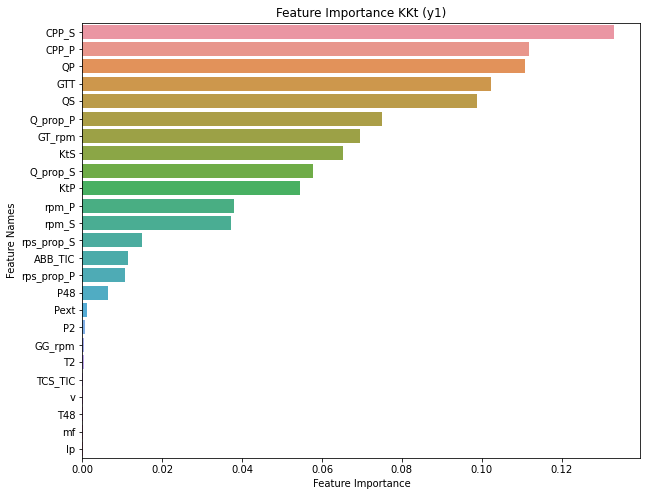

In [60]:
plot_feature_importance(RF_y1.feature_importances_,X_train.columns,'KKt (y1)')

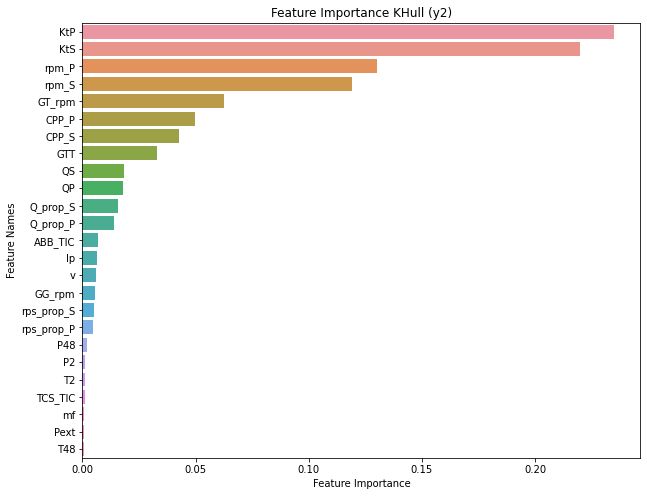

In [61]:
plot_feature_importance(RF_y2.feature_importances_,X_train.columns,'KHull (y2)')

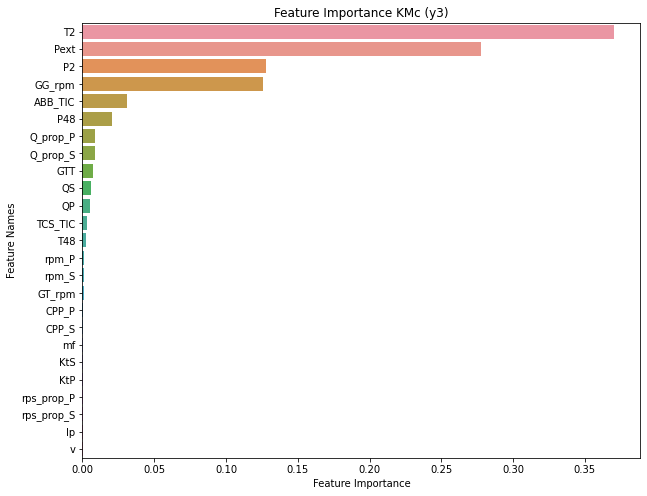

In [62]:
plot_feature_importance(RF_y3.feature_importances_,X_train.columns,'KMc (y3)')

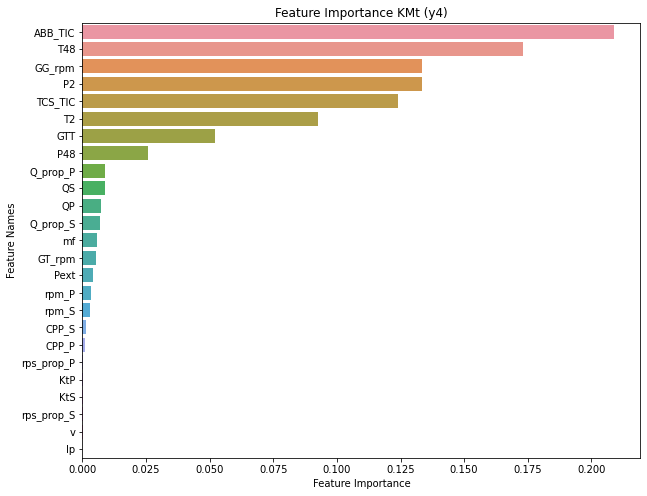

In [63]:
plot_feature_importance(RF_y4.feature_importances_,X_train.columns,'KMt (y4)')

### Random Forest visualization

In [46]:
print("Max depth of RF y1: ", RF_y1.estimators_[0].tree_.max_depth,"\n")
print("Max depth of RF y2: ", RF_y2.estimators_[0].tree_.max_depth,"\n")
print("Max depth of RF y3: ", RF_y3.estimators_[0].tree_.max_depth,"\n")
print("Max depth of RF y4: ", RF_y2.estimators_[0].tree_.max_depth,"\n")

Max depth of RF y1:  51 

Max depth of RF y2:  41 

Max depth of RF y3:  48 

Max depth of RF y4:  41 



In [47]:
RF1 = RandomForestRegressor(n_estimators=80, max_depth = 3, random_state=0)
RF1.fit(X_train, y1_train)
RF2 = RandomForestRegressor(n_estimators=80, max_depth = 3, random_state=0)
RF2.fit(X_train, y2_train)
RF3 = RandomForestRegressor(n_estimators=80, max_depth = 3, random_state=0)
RF3.fit(X_train, y3_train)
RF4 = RandomForestRegressor(n_estimators=80, max_depth = 3, random_state=0)
RF4.fit(X_train, y4_train)

RandomForestRegressor(max_depth=3, n_estimators=80, random_state=0)

[Text(558.0, 951.3000000000001, 'GTT <= 80069.0\nmse = 0.001\nsamples = 208608\nvalue = 0.953'),
 Text(279.0, 679.5, 'KtP <= 0.195\nmse = 0.001\nsamples = 199231\nvalue = 0.954'),
 Text(139.5, 407.70000000000005, 'QP <= 652165.0\nmse = 0.001\nsamples = 175087\nvalue = 0.951'),
 Text(69.75, 135.89999999999998, 'mse = 0.001\nsamples = 165158\nvalue = 0.953'),
 Text(209.25, 135.89999999999998, 'mse = 0.0\nsamples = 9929\nvalue = 0.922'),
 Text(418.5, 407.70000000000005, 'GTT <= 77787.5\nmse = 0.0\nsamples = 24144\nvalue = 0.979'),
 Text(348.75, 135.89999999999998, 'mse = 0.0\nsamples = 19930\nvalue = 0.983'),
 Text(488.25, 135.89999999999998, 'mse = 0.0\nsamples = 4214\nvalue = 0.96'),
 Text(837.0, 679.5, 'CPP_S <= 634.645\nmse = 0.0\nsamples = 9377\nvalue = 0.922'),
 Text(697.5, 407.70000000000005, 'CPP_S <= 615.09\nmse = 0.0\nsamples = 6050\nvalue = 0.912'),
 Text(627.75, 135.89999999999998, 'mse = 0.0\nsamples = 3279\nvalue = 0.905'),
 Text(767.25, 135.89999999999998, 'mse = 0.0\nsampl

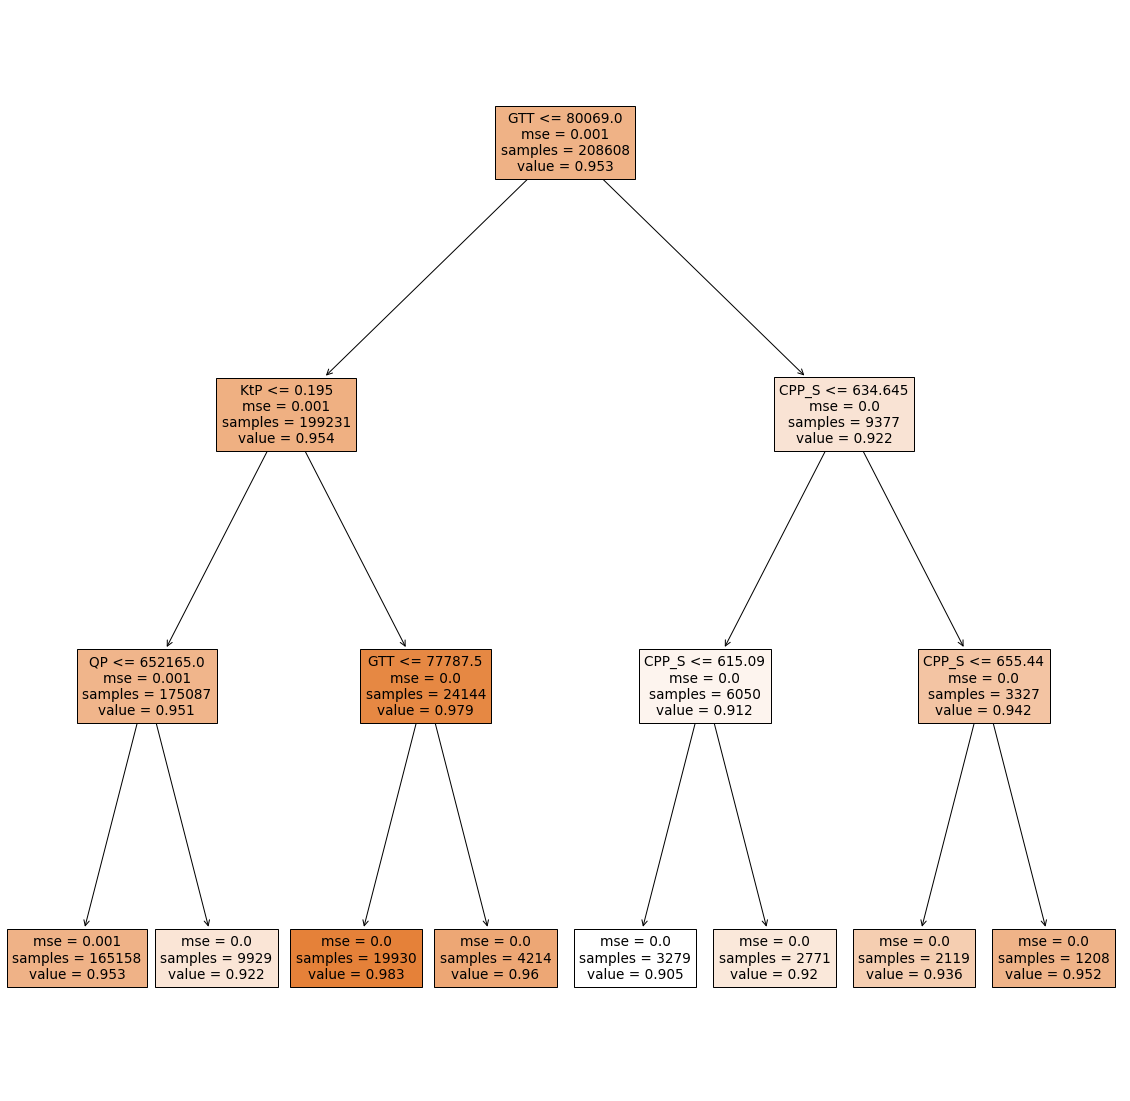

In [50]:
plt.figure(figsize=(20,20))
tree.plot_tree(RF1.estimators_[0], feature_names=X.columns, filled=True)

[Text(558.0, 951.3000000000001, 'KtP <= 0.187\nmse = 0.004\nsamples = 208608\nvalue = 1.094'),
 Text(279.0, 679.5, 'rpm_P <= 67.763\nmse = 0.004\nsamples = 132148\nvalue = 1.073'),
 Text(139.5, 407.70000000000005, 'CPP_S <= 63.699\nmse = 0.004\nsamples = 80305\nvalue = 1.096'),
 Text(69.75, 135.89999999999998, 'mse = 0.004\nsamples = 59769\nvalue = 1.083'),
 Text(209.25, 135.89999999999998, 'mse = 0.002\nsamples = 20536\nvalue = 1.133'),
 Text(418.5, 407.70000000000005, 'KtS <= 0.182\nmse = 0.001\nsamples = 51843\nvalue = 1.036'),
 Text(348.75, 135.89999999999998, 'mse = 0.001\nsamples = 35330\nvalue = 1.022'),
 Text(488.25, 135.89999999999998, 'mse = 0.001\nsamples = 16513\nvalue = 1.068'),
 Text(837.0, 679.5, 'GT_rpm <= 3513.35\nmse = 0.003\nsamples = 76460\nvalue = 1.13'),
 Text(697.5, 407.70000000000005, 'KtS <= 0.192\nmse = 0.002\nsamples = 56236\nvalue = 1.146'),
 Text(627.75, 135.89999999999998, 'mse = 0.001\nsamples = 25181\nvalue = 1.122'),
 Text(767.25, 135.89999999999998, 'm

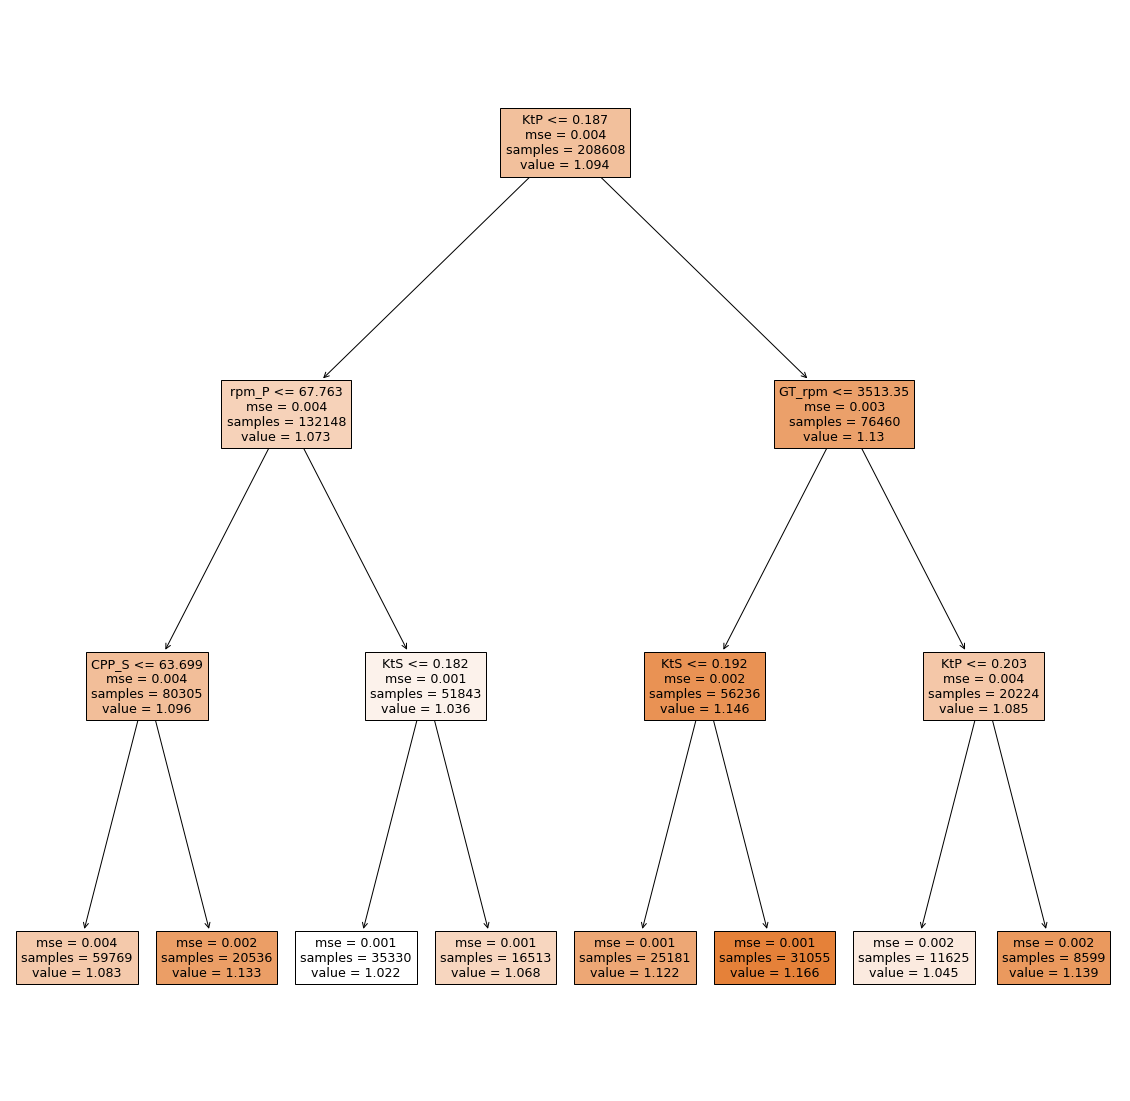

In [51]:
plt.figure(figsize=(20,20))
tree.plot_tree(RF2.estimators_[0], feature_names=X.columns, filled=True)

[Text(558.0, 951.3000000000001, 'Pext <= 1.052\nmse = 0.0\nsamples = 208608\nvalue = 0.977'),
 Text(279.0, 679.5, 'T2 <= 743.035\nmse = 0.0\nsamples = 197770\nvalue = 0.976'),
 Text(139.5, 407.70000000000005, 'GG_rpm <= 6657.85\nmse = 0.0\nsamples = 178435\nvalue = 0.977'),
 Text(69.75, 135.89999999999998, 'mse = 0.0\nsamples = 7871\nvalue = 0.99'),
 Text(209.25, 135.89999999999998, 'mse = 0.0\nsamples = 170564\nvalue = 0.977'),
 Text(418.5, 407.70000000000005, 'Pext <= 1.05\nmse = 0.0\nsamples = 19335\nvalue = 0.964'),
 Text(348.75, 135.89999999999998, 'mse = 0.0\nsamples = 13437\nvalue = 0.96'),
 Text(488.25, 135.89999999999998, 'mse = 0.0\nsamples = 5898\nvalue = 0.972'),
 Text(837.0, 679.5, 'Pext <= 1.053\nmse = 0.0\nsamples = 10838\nvalue = 0.991'),
 Text(697.5, 407.70000000000005, 'ABB_TIC <= 90.708\nmse = 0.0\nsamples = 7299\nvalue = 0.988'),
 Text(627.75, 135.89999999999998, 'mse = 0.0\nsamples = 2976\nvalue = 0.995'),
 Text(767.25, 135.89999999999998, 'mse = 0.0\nsamples = 432

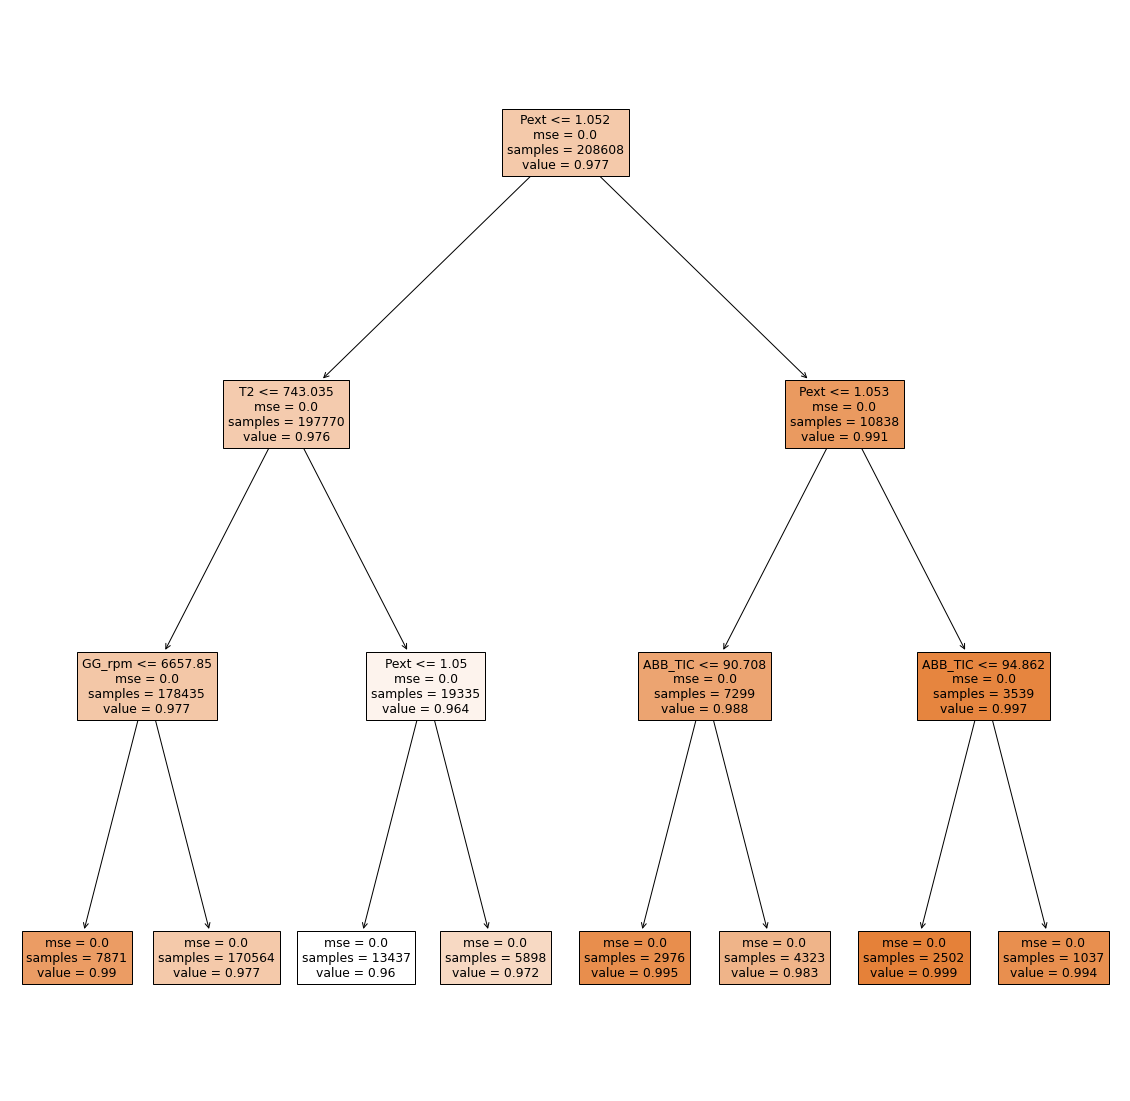

In [52]:
plt.figure(figsize=(20,20))
tree.plot_tree(RF3.estimators_[0], feature_names=X.columns, filled=True)

[Text(558.0, 951.3000000000001, 'P2 <= 23.444\nmse = 0.0\nsamples = 208608\nvalue = 0.988'),
 Text(279.0, 679.5, 'GTT <= 79430.5\nmse = 0.0\nsamples = 202275\nvalue = 0.988'),
 Text(139.5, 407.70000000000005, 'P2 <= 23.135\nmse = 0.0\nsamples = 196507\nvalue = 0.988'),
 Text(69.75, 135.89999999999998, 'mse = 0.0\nsamples = 193293\nvalue = 0.988'),
 Text(209.25, 135.89999999999998, 'mse = 0.0\nsamples = 3214\nvalue = 0.982'),
 Text(418.5, 407.70000000000005, 'TCS_TIC <= 97.492\nmse = 0.0\nsamples = 5768\nvalue = 0.994'),
 Text(348.75, 135.89999999999998, 'mse = 0.0\nsamples = 4288\nvalue = 0.996'),
 Text(488.25, 135.89999999999998, 'mse = 0.0\nsamples = 1480\nvalue = 0.986'),
 Text(837.0, 679.5, 'T2 <= 786.235\nmse = 0.0\nsamples = 6333\nvalue = 0.982'),
 Text(697.5, 407.70000000000005, 'ABB_TIC <= 91.387\nmse = 0.0\nsamples = 2814\nvalue = 0.985'),
 Text(627.75, 135.89999999999998, 'mse = 0.0\nsamples = 1140\nvalue = 0.979'),
 Text(767.25, 135.89999999999998, 'mse = 0.0\nsamples = 1674

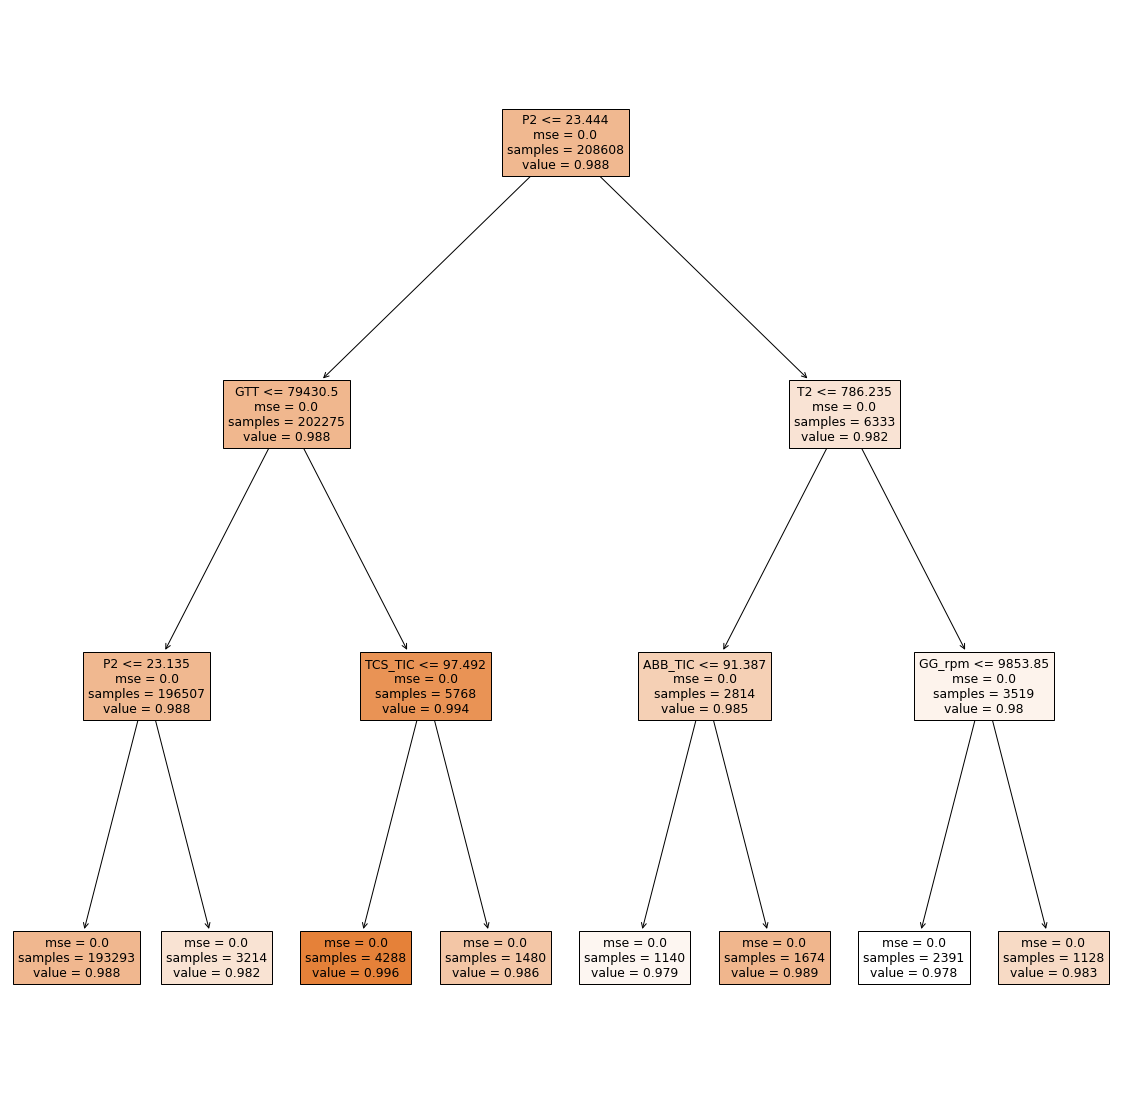

In [53]:
plt.figure(figsize=(20,20))
tree.plot_tree(RF4.estimators_[0], feature_names=X.columns, filled=True)

[Text(277.5807463187878, 214.85142857142856, 'KtP <= 0.187\nmse = 0.004\nsamples = 208608\nvalue = 1.094'),
 Text(251.4122863057587, 209.6742857142857, 'rpm_P <= 67.763\nmse = 0.004\nsamples = 132148\nvalue = 1.073'),
 Text(227.3387304427899, 204.49714285714285, 'CPP_S <= 63.699\nmse = 0.004\nsamples = 80305\nvalue = 1.096'),
 Text(193.8294376570806, 199.32, 'Q_prop_S <= 61565.5\nmse = 0.004\nsamples = 59769\nvalue = 1.083'),
 Text(131.8471049897719, 194.14285714285714, 'KtP <= 0.062\nmse = 0.004\nsamples = 46556\nvalue = 1.094'),
 Text(16.821428702010774, 188.96571428571428, 'KtP <= 0.015\nmse = 0.004\nsamples = 42890\nvalue = 1.088'),
 Text(2.867521105326392, 183.78857142857143, 'KtP <= 0.014\nmse = 0.001\nsamples = 1542\nvalue = 1.032'),
 Text(0.8562406087304767, 178.61142857142858, 'rpm_P <= 57.452\nmse = 0.0\nsamples = 532\nvalue = 1.013'),
 Text(0.4204776932318783, 173.43428571428572, 'CPP_S <= 5.658\nmse = 0.0\nsamples = 212\nvalue = 1.021'),
 Text(0.19307649179014819, 168.25714

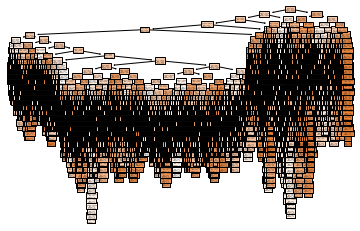

In [96]:
#tree.plot_tree(RF_y2.estimators_[0], feature_names=X.columns, filled=True)

### Predicting y

#### Predicting y3

In [12]:
RF_y3 = RandomForestRegressor(n_estimators=80, random_state=0)
RF_y3.fit(X_train, y3_train)

RandomForestRegressor(n_estimators=80, random_state=0)

In [13]:
y3_pred_RF = RF_y3.predict(X_test)

In [14]:
with pd.option_context('display.max_columns', 30):
    print(nps.describe(include='all'))

                  lp              v            GTT         GT_rpm  \
count  589223.000000  589223.000000  589223.000000  589223.000000   
mean        5.166053      14.998177   29929.568972    2135.231645   
std         2.626270       7.745928   24178.106721     770.738707   
min         1.138000       3.000000     241.320000    1306.900000   
25%         3.144000       9.000000    8845.600000    1386.800000   
50%         5.140000      15.000000   23814.000000    1924.600000   
75%         7.148000      21.000000   44822.000000    2678.100000   
max         9.300000      27.000000   83143.000000    3570.300000   

               CPP_S          CPP_P             QP          rpm_P  \
count  589223.000000  589223.000000  589223.000000  589223.000000   
mean      232.376110     232.376110  341574.929395      93.502109   
std       201.792355     201.792355  276108.112868      33.750726   
min         5.308000       5.308000   34810.000000      57.228000   
25%        60.878000      60.8780

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Predicting y3 using 25 Features
prediction_y3 = RF_y3.predict(sc.transform([[5, 15, 30000, 2135, 232, 232, 340000, 93, 341575, 
                                             34, 748, 8264, 0.7, 35, 13, 651, 1.02, 2.4, 36, 0.15, 
                                             1.6, 0.15, 1.6, 315000, 315000]]))
print(prediction_y3)

[0.9976375]
